<h1>Consolidated Segmentation and Churn Analysis of Bank Clients</h1>

By: [Tamjid Ahsan](https://www.linkedin.com/in/tamjidahsan/) 

<br>

As capstone project of [Flatiron Data Science Bootcamp](https://flatironschool.com/campus-and-online-data-science-bootcamp/).
* Student pace: Full Time
* Scheduled project review date/time: July 22, 2021, 04:00 PM [DST]
* Instructor name: James Irving

## ABSTRACT
___
Attracting new customers is no longer a good strategy for mature businesses since the cost of retaining existing customers is much lower. For this reason, customer churn management becomes instrumental for any service industry.

This analysis is combining churn prediction and customer segmentation and aims to come up with an integrated customer analytics outline for churn management. There are six components in this analysis, starting with data pre-processing, exploratory data analysis, customer segmentation, customer characteristics analytics, churn prediction, and factor analysis. This analysis is adapting OESMiN framework for data science.

Customer data of a bank is used for this analysis. After preprocessing and exploratory data analysis, customer segmentation is carried out using K-means clustering. A Random Forest model is used focusing on optimizing f-1 score to validate the clustering and get feature importance. By using this model, customers are segmented into different groups, which sanctions marketers and decision makers to implement existing customer retention strategies more precisely.  Then different machine learning models are used with the preprocessed data along with the segmentation prediction from the K-means clustering model. For this type of modeling, models were optimized for precision. To address class imbalance Synthetic Minority Oversampling Technique (SMOTE) is applied to the training set. For factor analysis feature importance of models are used.


## OVERVIEW
___
<br>

<img src="./assets/banner_0.jpg"
     alt="head"
     style="float: center; margin-center: 2px;"><br>

Customer churn is a big issue that occurs when consumers abandon your products and go to another provider. Because of the direct impact on profit margins, firms are now focusing on identifying consumers who are at danger of churning and keeping them through tailored promotional offers. Customer churn analysis and customer turnover rates are frequently used as essential business indicators by banks, insurance firms, streaming service providers, and telecommunications service providers since the cost of maintaining existing customers is significantly less than the cost of obtaining a new one.

When it comes to customers, the financial crisis of 2008 changed the banking sector's strategy. Prior to the financial crisis, banks were mostly focused on acquiring more and more clients. However, once the market crashed after the market imploded, banks realized rapidly that the expense of attracting new clients is multiple times higher than holding existing ones, which means losing clients can be monetarily unfavorable. Fast forward to today, and the global banking sector has a market capitalization of $7.6 trillion, with technology and laws making things easier than ever to transfer assets and money between institutions. Furthermore, it has given rise to new forms of competition for banks, such as open banking, neo-banks, and fin-tech businesses (Banking as a Service (BaaS))<sup>[1]</sup>. Overall, today's consumers have more options than ever before, making it easier than ever to transfer or quit banks altogether. According to studies, repeat customers seem to be more likely to spend 67 percent more on a bank's products and services, emphasizing the necessity of knowing why clients churn and how it varies across different characteristics. Banking is one of those conventional sectors that has undergone continuous development throughout the years. Nonetheless, many banks today with a sizable client base expecting to gain a competitive advantage have not tapped into the huge amounts of data they have, particularly in tackling one of the most well-known challenges, customer turnover.

Churn can be expressed as a level of customer inactivity or disengagement seen over a specific period. This expresses itself in the data in a variety of ways e.g., frequent balance transfers to another account or unusual drop in average balance over time. But how can anyone look for churn indicators? Collecting detailed feedback on the customer's experience might be difficult. For one thing, surveys are both rare and costly. Furthermore, not all clients receive it, or bother to reply to it. So, where else can you look for indicators of future client dissatisfaction? The solution consists in identifying early warning indicators from existing data. Advanced machine learning and data science techniques can learn from previous customer behavior and external events that lead to churn and use this knowledge to anticipate the possibility of a churn-like event in the future.

___

Ref:

[1] [Business Insider](https://www.businessinsider.com/banking-industry-trends)

[2] Stock images from [PEXELS](https://www.pexels.com/)


## BUSINESS PROBLEM
___
<img src="./assets/banner.gif"
     alt="head"
     style="float: center; margin-center: 2px;"><br>

While everyone recognizes the importance of maintaining existing customers and therefore improving their lifetime value, there is very little banks can do about customer churn when they don't anticipate it coming in the first place. Predicting attrition becomes critical in this situation, especially when unambiguous consumer feedback is lacking. Precise prediction enables advertisers and client experience groups to be imaginative and proactive in their offering to the client.

This analysis focuses on the behavior of bank customers who are more likely to leave the bank (i.e. close their bank account).

## IMPORTS

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from imports_and_functions.packages import *
import imports_and_functions as fn

In [3]:
# notebook styling
try:
    from jupyterthemes import jtplot
except:
    !pip install jupyterthemes
    from jupyterthemes import jtplot
# jtplot.reset() # reset notebook styling
jtplot.style(theme='monokai', context='notebook', ticks='True', grid='False')

# OBTAIN

The data for this analysis is obtained from <i>Kaggle</i>, titled <b>"Credit Card customers"</b> uploaded by Sakshi Goyal. Which can be found [here](https://www.kaggle.com/sakshigoyal7/credit-card-customers), this dataset was originally obtained from [LEAPS Analyttica](https://leaps.analyttica.com/sample_cases/11). A copy of the data is in this repository at `/data/BankChurners.csv`.

This dataset contains data of more than 10000 credit card accounts with around 19 variables of different types as of a time point and their attrition indicator over the next 6 months. 

Data description is as below:

| Variable | Type | Description |
|:---:|:---:|:---:|
| Clientnum | Num | Client number. Unique identifier for the customer holding the account |
| Attrition_Flag | obj | Internal event (customer activity) variable - if the account is closed then 1 else 0 |
| Customer_Age | Num | Demographic variable - Customer's Age in Years |
| Gender | obj | Demographic variable - M=Male, F=Female |
| Dependent_count | Num | Demographic variable - Number of dependents |
| Education_Level | obj | Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.) |
| Marital_Status | obj | Demographic variable - Married, Single, Unknown |
| Income_Category | obj | Demographic variable - Annual Income Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, > $120K, Unknown) |
| Card_Category | obj | Product Variable - Type of Card (Blue, Silver, Gold, Platinum) |
| Months_on_book | Num | Months on book (Time of Relationship) |
| Total_Relationship_Count | Num | Total no. of products held by the customer |
| Months_Inactive_12_mon | Num | No. of months inactive in the last 12 months |
| Contacts_Count_12_mon | Num | No. of Contacts in the last 12 months |
| Credit_Limit | Num | Credit Limit on the Credit Card |
| Total_Revolving_Bal | Num | Total Revolving Balance on the Credit Card |
| Avg_Open_To_Buy | Num | Open to Buy Credit Line (Average of last 12 months) |
| Total_Amt_Chng_Q4_Q1 | Num | Change in Transaction Amount (Q4 over Q1)  |
| Total_Trans_Amt | Num | Total Transaction Amount (Last 12 months) |
| Total_Trans_Ct | Num | Total Transaction Count (Last 12 months) |
| Total_Ct_Chng_Q4_Q1 | Num | Change in Transaction Count (Q4 over Q1)  |
| Avg_Utilization_Ratio | Num | Average Card Utilization Ratio |

There are three unknown category in Education Level, Marital Status, and Income Category. Imputing values for those features does not make sense. And it is understandable why those are unknown in the first place. Information about Education and Marital status is often complicated and confidential and customers are reluctant to share those information. Same for the income level. It is best for the model to be able to handle when those information is not available and still produce prediction.

For this reason those are not imputed in any way for this analysis.

In [4]:
# loading dataset
raw_df = pd.read_csv('./data/BankChurners.csv')
# first view of the dataset
raw_df

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  \
0                  39  ...       12691.0                  777   
1                  44  ...        8256.0                  864   
2                  36  ...        3418.0                    0   
3                  34  ...        3313.0                 2517   
4                  21  ...        4716.0                    0   
...               ...  ...           ...                  ...   
10122              40  ...        4003.0                 1851   
10123              25  ...        4277.0                 2186   
10124              36  ...        5409.0                    0   
10125              36  ...        5281.0                    0   
10126              25  ...       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  \
0                    1.625                  0.061   
1                    3.714                  0.105   
2                    2.333                  0.000   
3                    2.333                  0.760   
4                    2.500                  0.000   
...                    ...                    ...   
10122                0.857                  0.462   
10123                0.683                  0.511   
10124     

In [5]:
# columns of the dataset
raw_df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

In [6]:
# no duplicates in the dataset
raw_df.CLIENTNUM.duplicated().value_counts()

False    10127
Name: CLIENTNUM, dtype: int64

In [7]:
# dropping customer identifier and unnecessary feature
raw_df.drop(columns=[
    'CLIENTNUM',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
    'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'
],
        inplace=True)
raw_df

Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      Existing Customer            45      M                3   
1      Existing Customer            49      F                5   
2      Existing Customer            51      M                3   
3      Existing Customer            40      F                4   
4      Existing Customer            40      M                3   
...                  ...           ...    ...              ...   
10122  Existing Customer            50      M                2   
10123  Attrited Customer            41      M                2   
10124  Attrited Customer            44      F                1   
10125  Attrited Customer            30      M                2   
10126  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married     $60K - $80K          Blue   
1            Graduate         Single  Less than $40K          Blue   
2            Graduate        Married    $80K - $120K          Blue   
3         High School        Unknown  Less than $40K          Blue   
4          Uneducated        Married     $60K - $80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single     $40K - $60K          Blue   
10123         Unknown       Divorced     $40K - $60K          Blue   
10124     High School        Married  Less than $40K          Blue   
10125        Graduate        Unknown     $40K - $60K          Blue   
10126        Graduate        Married  Less than $40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0                  39                         5                       1   
1                  44                         6                       1   
2                  36                         4                       1   
3                  34                         3                       4   
4                  21                         5                       1   
...               ...                       ...                     ...   
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
3                          1        3313.0                 2517   
4                          0        4716.0                    0   
...                      ...           ...                  ...   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0

In [8]:
# looking at the distribution for changing labels to more notebook friendly description
raw_df['Income_Category'].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: Income_Category, dtype: int64

In [9]:
# relabeling 
raw_df['Income_Category'] = raw_df['Income_Category'].apply(
    lambda x: x.replace("$", "")).apply(
        lambda x: x.replace(" - ", "_to_")).apply(
            lambda x: x.replace("120K +", "Above_120K")).apply(
                lambda x: x.replace("Less than 40K", "Less_than_40K"))
raw_df

Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      Existing Customer            45      M                3   
1      Existing Customer            49      F                5   
2      Existing Customer            51      M                3   
3      Existing Customer            40      F                4   
4      Existing Customer            40      M                3   
...                  ...           ...    ...              ...   
10122  Existing Customer            50      M                2   
10123  Attrited Customer            41      M                2   
10124  Attrited Customer            44      F                1   
10125  Attrited Customer            30      M                2   
10126  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0         High School        Married      60K_to_80K          Blue   
1            Graduate         Single   Less_than_40K          Blue   
2            Graduate        Married     80K_to_120K          Blue   
3         High School        Unknown   Less_than_40K          Blue   
4          Uneducated        Married      60K_to_80K          Blue   
...               ...            ...             ...           ...   
10122        Graduate         Single      40K_to_60K          Blue   
10123         Unknown       Divorced      40K_to_60K          Blue   
10124     High School        Married   Less_than_40K          Blue   
10125        Graduate        Unknown      40K_to_60K          Blue   
10126        Graduate        Married   Less_than_40K        Silver   

       Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0                  39                         5                       1   
1                  44                         6                       1   
2                  36                         4                       1   
3                  34                         3                       4   
4                  21                         5                       1   
...               ...                       ...                     ...   
10122              40                         3                       2   
10123              25                         4                       2   
10124              36                         5                       3   
10125              36                         4                       3   
10126              25                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
3                          1        3313.0                 2517   
4                          0        4716.0                    0   
...                      ...           ...                  ...   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0

In [10]:
# distribution of target
(raw_df.Attrition_Flag.value_counts(1)*100).round(2)

Existing Customer    83.93
Attrited Customer    16.07
Name: Attrition_Flag, dtype: float64

There is major class imbalance spotted in the target column.

In [11]:
df = raw_df.copy()
print(f'"df" statistical description: \n{"+"*40}')
display(fn.describe_dataframe(df))
print(f'"df" feature details: \n{"+"*40}\n')
fn.check_duplicates(df, verbose=2, limit_num=50)

"df" statistical description: 
++++++++++++++++++++++++++++++++++++++++


count unique                top  freq     mean  \
Attrition_Flag            10127.0      2  Existing Customer  8500            
Customer_Age              10127.0                                    46.33   
Gender                    10127.0      2                  F  5358            
Dependent_count           10127.0                                     2.35   
Education_Level           10127.0      7           Graduate  3128            
Marital_Status            10127.0      4            Married  4687            
Income_Category           10127.0      6      Less_than_40K  3561            
Card_Category             10127.0      4               Blue  9436            
Months_on_book            10127.0                                    35.93   
Total_Relationship_Count  10127.0                                     3.81   
Months_Inactive_12_mon    10127.0                                     2.34   
Contacts_Count_12_mon     10127.0                                     2.46   
Credit_Limit              10127.0                                  8631.95   
Total_Revolving_Bal       10127.0                                  1162.81   
Avg_Open_To_Buy           10127.0                                  7469.14   
Total_Amt_Chng_Q4_Q1      10127.0                                     0.76   
Total_Trans_Amt           10127.0                                  4404.09   
Total_Trans_Ct            10127.0                                    64.86   
Total_Ct_Chng_Q4_Q1       10127.0                                     0.71   
Avg_Utilization_Ratio     10127.0                                     0.27   

                              std     min     25%     50%      75%      max  \
Attrition_Flag                                                                
Customer_Age                 8.02    26.0    41.0    46.0     52.0     73.0   
Gender                                                                        
Dependent_count               1.3     0.0     1.0     2.0      3.0      5.0   
Education_Level                                                               
Marital_Status                                                                
Income_Category                                                               
Card_Category                                                                 
Months_on_book               7.99    13.0    31.0    36.0     40.0     56.0   
Total_Relationship_Count     1.55     1.0     3.0     4.0      5.0      6.0   
Months_Inactive_12_mon       1.01     0.0     2.0     2.0      3.0      6.0   
Contacts_Count_12_mon        1.11     0.0     2.0     2.0      3.0      6.0   
Credit_Limit              9088.78  1438.3  2555.0  4549.0  11067.5  34516.0   
Total_Revolving_Bal        814.99     0.0   359.0  1276.0   1784.0   2517.0   
Avg_Open_To_Buy           9090.69     3.0  1324.5  3474.0   9859.0  34516.0   
Total_Amt_Chng_Q4_Q1         0.22     0.0    0.63    0.74     0.86      3.4   
Total_Trans_Amt           3397.13   510.0  2155.5  3899.0   4741.0  18484.0   
Total_Trans_Ct              23.47    10.0    45.0    67.0     81.0    139.0   
Total_Ct_Chng_Q4_Q1          0.24     0.0    0.58     0.7     0.82     3.71   
Avg_Utilization_Ratio        0.28     0.0    0.02    0.18      0.5      1.0   

                            dtype  nulls  
Attrition_Flag             object      0  
Customer_Age                int64      0  
Gender                     object      0  
Dependent_count             int64      0  
Education_Level            object      0  
Marital_Status             object      0  
Income_Category            object      0  
Card_Category              object      0  
Months_on_book              int64      0  
Total_Relationship_Count    int64      0  
Months_Inactive_12_mon      int64      0  
Contacts_Count_12_mon       int64      0  
Credit_Limit              float64      0  
Total_Revolving_Bal         int64      0  
Avg_Open_To_Buy           float64      0  
Total_Amt_Chng_Q4_Q1      float64      0 

"df" feature details: 
++++++++++++++++++++++++++++++++++++++++

Attrition_Flag >> number of uniques: 2
Values:
['Existing Customer' 'Attrited Customer']
____________________________________________________________

Customer_Age >> number of uniques: 45
Values:
[45 49 51 40 44 32 37 48 42 65 56 35 57 41 61 47 62 54 59 63 53 58 55 66
 50 38 46 52 39 43 64 68 67 60 73 70 36 34 33 26 31 29 30 28 27]
____________________________________________________________

Gender >> number of uniques: 2
Values:
['M' 'F']
____________________________________________________________

Dependent_count >> number of uniques: 6
Values:
[3 5 4 2 0 1]
____________________________________________________________

Education_Level >> number of uniques: 7
Values:
['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
____________________________________________________________

Marital_Status >> number of uniques: 4
Values:
['Married' 'Single' 'Unknown' 'Divorced']
_______________

No null values to deal with. Features have the correct data type.

comment

# EDA

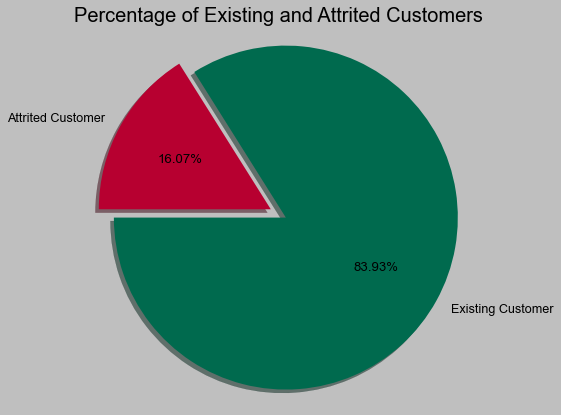

In [12]:
with plt.style.context('grayscale'): # seaborn-deep
    plt.pie([
        df.Attrition_Flag[df.Attrition_Flag == 'Existing Customer'].count(),
        df.Attrition_Flag[df.Attrition_Flag == 'Attrited Customer'].count()
    ],
            labels=['Existing Customer', 'Attrited Customer'],
            colors=['#006a4e', '#b70030'],
            explode=[0.1, 0],
            autopct='%1.2f%%',
            shadow=True,
            startangle=180)
    plt.title("Percentage of Existing and Attrited Customers", size=20)
    plt.axis('equal')
    plt.show()

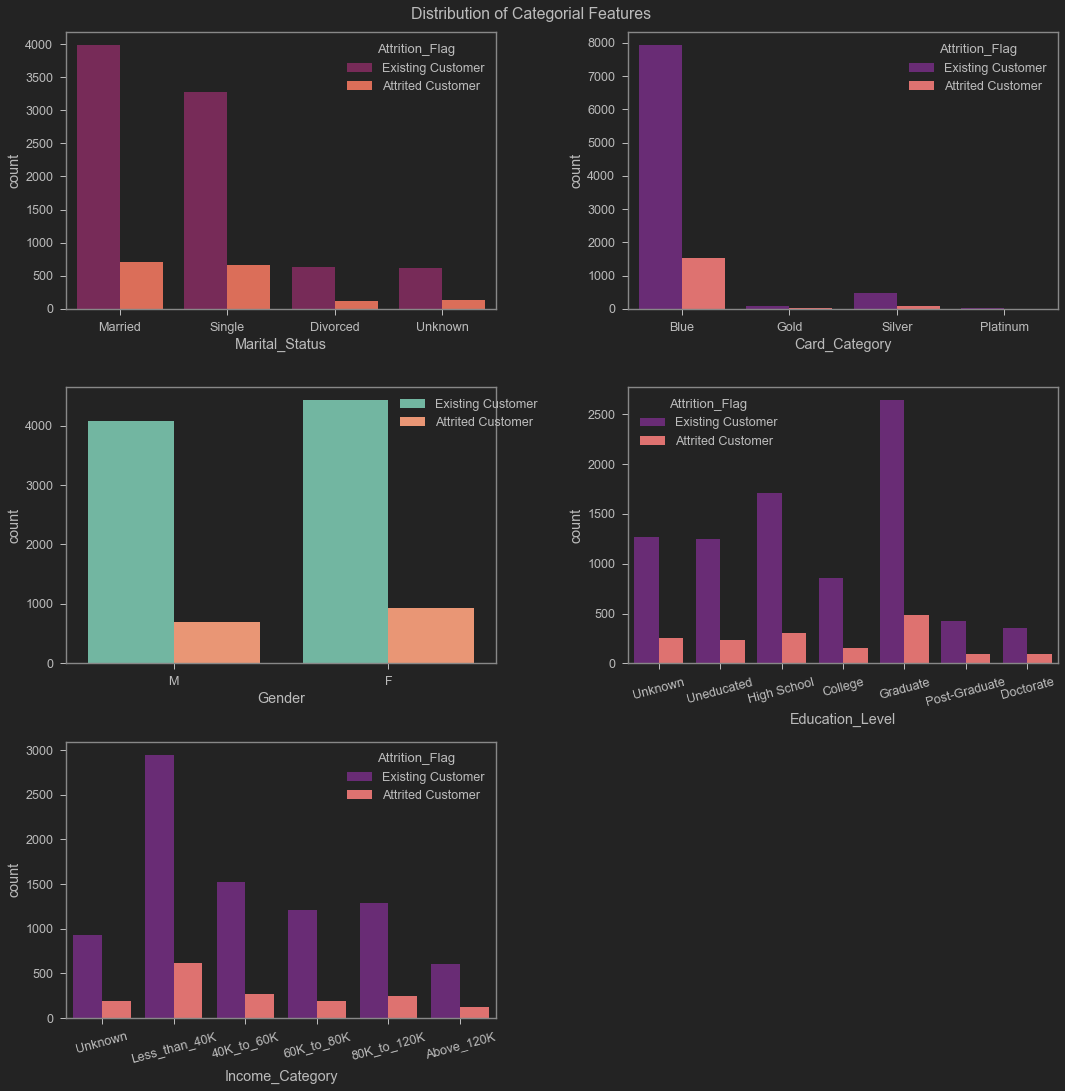

In [13]:
plt.figure(figsize=(15, 15))
plt.subplot(3, 2, 1)
sns.countplot(x=df['Marital_Status'],
              hue=df['Attrition_Flag'],
              palette='rocket',
              order=['Married', 'Single', 'Divorced', 'Unknown'])
plt.subplot(3, 2, 2)
sns.countplot(x=df['Card_Category'], hue=df['Attrition_Flag'], palette='magma')
plt.subplot(3, 2, 3)
sns.countplot(x=df['Gender'], hue=df['Attrition_Flag'], palette='Set2')
plt.legend(bbox_to_anchor=(.75, 1))
plt.subplot(3, 2, 4)
sns.countplot(x=df['Education_Level'],
              hue=df['Attrition_Flag'],
              palette='magma',
              order=[
                  'Unknown', 'Uneducated', 'High School', 'College',
                  'Graduate', 'Post-Graduate', 'Doctorate'
              ])
plt.xticks(rotation=15)
plt.subplot(3, 2, 5)
sns.countplot(x=df['Income_Category'],
              hue=df['Attrition_Flag'],
              palette='magma',
              order=[
                  'Unknown', 'Less_than_40K', '40K_to_60K', '60K_to_80K',
                  '80K_to_120K', 'Above_120K'
              ])
plt.xticks(rotation=15)
plt.tight_layout()
plt.suptitle(f'Distribution of Categorial Features \n', va='bottom')
plt.show()

comment

In [14]:
fn.plot_distribution(df.select_dtypes('number'),
                     plot_title='Histogram plots of numerical columns')

comment

In [15]:
print(f'Minimum customer age: {df.Customer_Age.unique().min()}')
print(f'Maximum customer age: {df.Customer_Age.unique().max()}')

Minimum customer age: 26
Maximum customer age: 73


In [16]:
s = df[~pd.isnull(df['Customer_Age'])][['Customer_Age']]
chart, labels = np.histogram(s, bins=10)
kde = sts.gaussian_kde(s['Customer_Age'])
kde_data = kde.pdf(np.linspace(labels.min(), labels.max()))
# main statistics
stats = df['Customer_Age'].describe().to_frame().T
charts = [
    go.Bar(x=labels[1:], y=chart, name='Histogram'),
    go.Scatter(x=list(range(len(kde_data))),
               y=kde_data,
               name='KDE',
               yaxis='y2',
               xaxis='x2',
               line={
                   'shape': 'spline',
                   'smoothing': 0.3
               },
               mode='lines')
]
figure = go.Figure(
    data=charts,
    layout=go.Layout(
        {
            'barmode': 'group',
            'legend': {
                'orientation': 'h'
            },
            'title': {
                'text': 'Customer_Age Histogram (bins: 10) with KDE'
            },
            'xaxis2': {
                'anchor': 'y',
                'overlaying': 'x',
                'side': 'top'
            },
            'yaxis': {
                'side': 'left',
                'title': {
                    'text': 'Frequency'
                }
            },
            'yaxis2': {
                'overlaying': 'y',
                'side': 'right',
                'title': {
                    'text': 'KDE'
                }
            }
        },
        template='plotly_dark'))
figure.show()

comment

In [17]:
# pairweise eda

In [18]:
sns.histplot(x=df.Customer_Age,
             hue=df.Attrition_Flag,
             kde=True,
             binwidth=5,
             palette='magma')
plt.title('Customer Age & Churn')
plt.show()

In [19]:
sns.lmplot(x='Credit_Limit',
           y='Avg_Utilization_Ratio',
           data=df,
           col='Attrition_Flag',
           palette='Set2',
           scatter_kws={
               "s": 5,
               "color": 'silver'
           },
           line_kws={
               'lw': 2,
               'color': 'gold'
           })
plt.suptitle('Credit Limit & Avg Utilization Ratio on Customer Churn \n',
             va='bottom',
             fontsize=20)
plt.show()

In [20]:
sns.boxplot(y='Dependent_count',
            x='Total_Relationship_Count',
            data=df,
            hue='Attrition_Flag',
            palette='magma')
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")

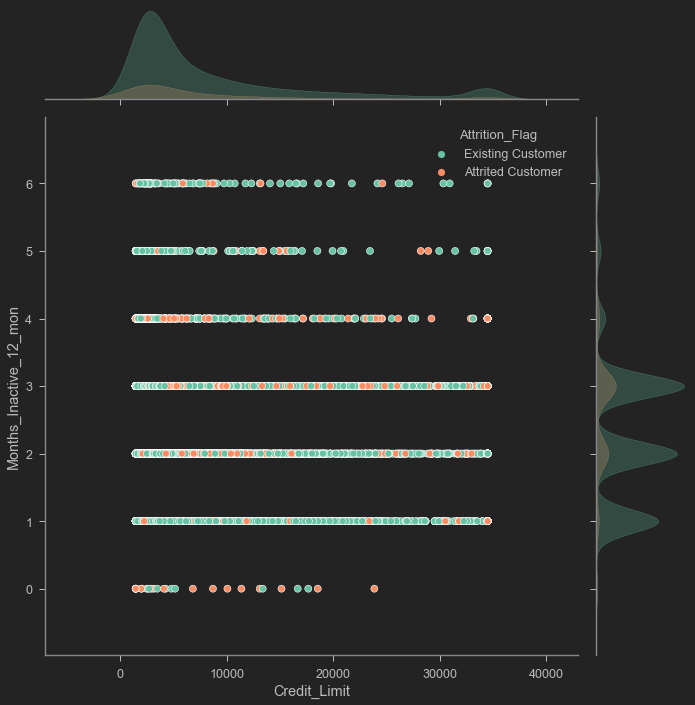

In [21]:
g = sns.jointplot(data=df,
              x='Credit_Limit',
              y='Months_Inactive_12_mon',
              hue='Attrition_Flag',
              palette='Set2',
              height=10)

In [22]:
# sns.pairplot(df, hue="Attrition_Flag")

# SCRUB

In [23]:
(df.Attrition_Flag.value_counts(1)*100).round(2)

Existing Customer    83.93
Attrited Customer    16.07
Name: Attrition_Flag, dtype: float64

Class imbalance will be addressed by synthetic oversampling later in this section.

## Label encoding

In [24]:
churn_map = {'Existing Customer':0, 'Attrited Customer':1}

In [25]:
X = df.drop(columns='Attrition_Flag').copy()
y = df.Attrition_Flag.map(churn_map).copy()

## Train-Test split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8)

## Encoding & Scaling

### Pipeline

In [27]:
# isolating numerical cols
nume_col = list(X.select_dtypes('number').columns)
# isolating categorical cols
cate_col = list(X.select_dtypes('object').columns)
# pipeline for processing categorical features
pipe_cate = Pipeline([('ohe', OneHotEncoder(sparse=False, drop=None))])
# pipeline for processing numerical features
pipe_nume = Pipeline([('scaler', StandardScaler())])
# transformer
preprocessor = ColumnTransformer([('nume_feat', pipe_nume, nume_col),
                                  ('cate_feat', pipe_cate, cate_col)])
# creating dataframes
# X_train
X_train_pr = pd.DataFrame(preprocessor.fit_transform(X_train),
                          columns=nume_col +
                          list(preprocessor.named_transformers_['cate_feat'].
                               named_steps['ohe'].get_feature_names(cate_col)))
# X_test
X_test_pr = pd.DataFrame(preprocessor.fit_transform(X_test),
                         columns=nume_col +
                         list(preprocessor.named_transformers_['cate_feat'].
                              named_steps['ohe'].get_feature_names(cate_col)))

## SMOTENC

In [28]:
X_train_pr

Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
0        -2.289042        -1.025032       -2.877711                  0.121114   
1         1.324248        -1.793830        1.133811                  1.410397   
2         0.078286         0.512564        0.130931                  1.410397   
3         0.701267        -1.025032        0.883091                  0.765756   
4        -1.167676        -0.256234       -0.746589                 -1.168169   
...            ...              ...             ...                       ...   
8096     -0.669291         0.512564       -0.370509                  1.410397   
8097     -1.292272        -1.025032       -1.373390                  1.410397   
8098     -0.420099         0.512564       -0.370509                  0.121114   
8099      1.075056        -0.256234        0.005571                  0.765756   
8100     -0.420099        -1.025032        0.005571                  0.121114   

      Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                   0.641987               0.486654      1.282133   
1                  -0.344683              -0.417148     -0.659693   
2                   0.641987              -2.224751     -0.310969   
3                  -0.344683               0.486654     -0.789233   
4                   1.628657               1.390456      0.572652   
...                      ...                    ...           ...   
8096                0.641987               2.294258     -0.789233   
8097                0.641987              -0.417148     -0.164126   
8098                0.641987               1.390456      0.095802   
8099               -1.331353              -0.417148     -0.647326   
8100               -0.344683               0.486654     -0.655682   

      Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  ...  \
0                0.053278         1.277135              1.012330  ...   
1               -1.420480        -0.530339              0.250708  ...   
2                0.509849        -0.357334             -0.473986  ...   
3               -0.681153        -0.727150              0.232245  ...   
4               -1.420480         0.701863             -2.800394  ...   
...                   ...              ...                   ...  ...   
8096            -1.420480        -0.659864             -2.098779  ...   
8097             0.944387        -0.250055              0.204549  ...   
8098             0.360515         0.062981             -1.281767  ...   
8099             0.558811        -0.698108             -0.206265  ...   
8100             0.136513        -0.668030             -0.146258  ...   

      Income_Category_40K_to_60K  Income_Category_60K_to_80K  \
0                            0.0                         0.0   
1                            1.0                         0.0   
2                            0.0                         1.0   
3                            0.0                         0.0   
4                            0.0                         0.0   
...                          ...                         ...   
8096                         0.0                         0.0   
8097                         0.0                         0.0   
8098                         0.0                         1.0   
8099                         0.0                         0.0   
8100                         0.0                         0.0   

      Income_Category_80K_to_120K  Income_Category_Above_120K  \
0                             0.0                         0.0   
1                             0.0                         0.0   
2                             0.0                         0.0   
3                             0.0                         0.0   
4                             0.0                         1.0   
...                           ...                         ...   
8096                          0.0                         0.0   
8097                          0.0     

In [29]:
smotenc_features = [False] * len(nume_col) + [True] * (
    len(X_train_pr.columns) - len(nume_col))
# smotenc_features

In [30]:
oversampling = SMOTENC(categorical_features=smotenc_features, n_jobs=-1)

In [31]:
X_train_pr_os, y_train_encoded_os = oversampling.fit_sample(
                                                        X_train_pr, y_train)

# MODEL

## Segmentation

In [32]:
# # lable Encoding
# Education_Level_map = {
#     'High School': 2,
#     'Graduate': 4,
#     'Uneducated': 0,
#     'Unknown': 1,
#     'College': 3,
#     'Post-Graduate': 5,
#     'Doctorate': 6
# }
# Income_Category_map = {
#     '60K_to_80K': 3,
#     'Less_than_40K': 1,
#     '80K_to_120K': 4,
#     '40K_to_60K': 3,
#     'Above_120K': 5,
#     'Unknown': 0
# }
# Card_Category_map = {'Blue': 0, 'Gold': 2, 'Silver': 1, 'Platinum': 3}

# # OHE
# Marital_Status_map = {'Married': 2, 'Single': 1, 'Unknown': 0, 'Divorced': 3}
# Gender_map = {'M': 1, 'F': 0}

# X.Education_Level = X.Education_Level.map(Education_Level_map)
# X.Income_Category = X.Income_Category.map(Income_Category_map)
# X.Card_Category = X.Card_Category.map(Card_Category_map)

# X.Marital_Status = X.Marital_Status.map(Marital_Status_map)
# X.Gender = X.Gender.map(Gender_map)
# display("X",X)

# seg_scaler = StandardScaler()
# seg_scaler.fit(X)
# X_segmentation = pd.DataFrame(seg_scaler.transform(X),columns=X.columns)
# display("X_segmentation", X_segmentation)

# NOTE: Tried diffrent versions of the dataset for modeling, 
# - Diffrent encoding
# - Diffrent scaler
# performance is mostly indiffrent

In [33]:
X_segmentation = fn.dataset_processor_segmentation(X, verbose=2)

Numerical columns: 
---------------------
 ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

Categorical columns: 
---------------------
 ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']


------
Scaler: StandardScaler, settings: {'copy': True, 'with_mean': True, 'with_std': True}
Encoder: OneHotEncoder, settings: {'categories': 'auto', 'drop': None, 'dtype': <class 'numpy.float64'>, 'handle_unknown': 'error', 'sparse': False}
------


### Finding "K"

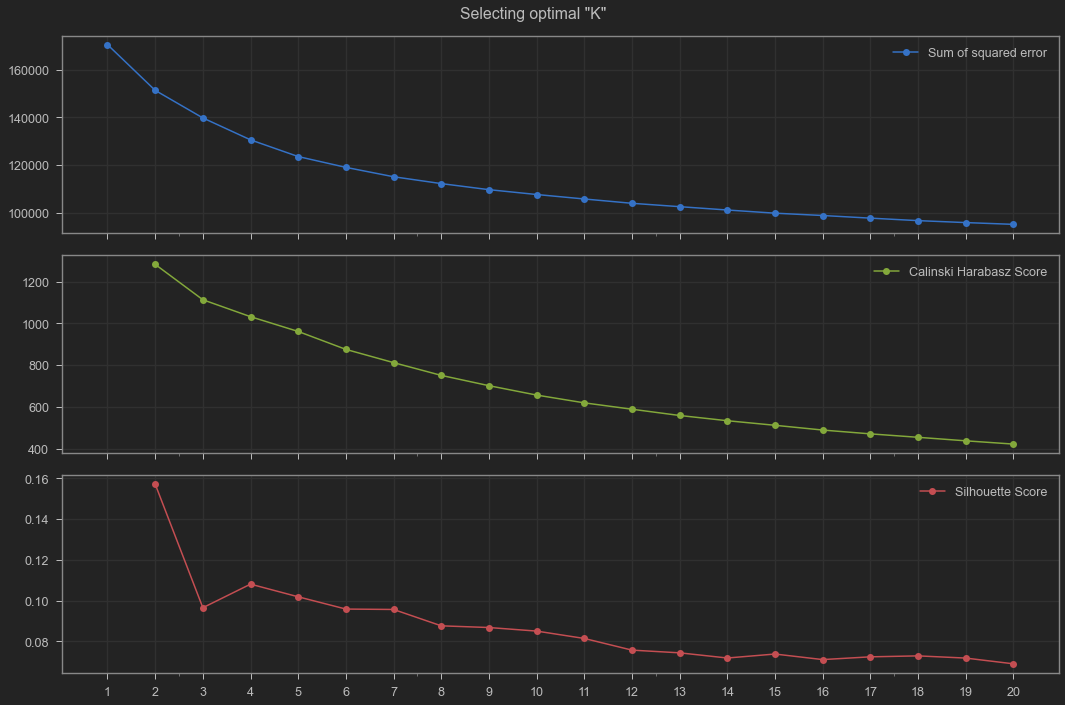

In [34]:
search_range = range(1, 21)
report = {}
for k in search_range:
    temp_dict = {}
    kmeans = KMeans(init='k-means++',
                    algorithm='auto',
                    n_clusters=k,
                    max_iter=1000,
                    random_state=1,
                    verbose=0).fit(X_segmentation)
    inertia = kmeans.inertia_
    temp_dict['Sum of squared error'] = inertia
    try:
        cluster = kmeans.predict(X_segmentation)
        chs = metrics.calinski_harabasz_score(X_segmentation, cluster)
        ss = metrics.silhouette_score(X_segmentation, cluster)
        temp_dict['Calinski Harabasz Score'] = chs
        temp_dict['Silhouette Score'] = ss
        report[k] = temp_dict
    except:
        report[k] = temp_dict

report_df = pd.DataFrame(report).T
report_df.plot(figsize=(15, 10),
               xticks=search_range,
               grid=True,
               title=f'Selecting optimal "K"',
               subplots=True,
               marker='o',
               sharex=True)
plt.tight_layout()

higher Silhouette Coefficient score relates to a model with better defined clusters. higher Calinski-Harabasz score relates to a model with better defined clusters.

Based on the `Silhouette Score` and `Sum of squared error` (a.k.a. Elbow plot), 5 segmentation seemed optimal. `Calinski Harabasz Score` also supports this segmentation. Customers are segmented by 5 groups by their characteristics. 

In [ ]:
from yellowbrick.cluster.elbow import kelbow_visualizer
with plt.style.context('ggplot'):
    kelbow_visualizer(KMeans(random_state=1),
                      X_segmentation,
                      k=(2, 10),
                      timings=True)

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth
bandwidth = estimate_bandwidth(X_segmentation, quantile=0.3, n_jobs=-1)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=False, n_jobs=-1, max_iter=500)
ms.fit(X_segmentation)
labels = ms.labels_
cluster_centers = ms.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
print(f"Number of estimated clusters : {n_clusters_}")

### Selecting "K"

In [71]:
n_clusters=5

In [72]:
kmeans = KMeans(
    init='k-means++',
    algorithm='auto',
    n_clusters=n_clusters,
    max_iter=1000,
    random_state=1,  # selecting random_state=1 for reproducibility
    verbose=0).fit(X_segmentation)

In [73]:
clusters = kmeans.predict(X_segmentation)
cluster_df = X_segmentation.copy()
cluster_df['Clusters'] = clusters
cluster_df

Customer_Age  Dependent_count  Months_on_book  \
0         -0.165406         0.503368        0.384621   
1          0.333570         2.043199        1.010715   
2          0.583058         0.503368        0.008965   
3         -0.789126         1.273283       -0.241473   
4         -0.789126         0.503368       -1.869317   
...             ...              ...             ...   
10122      0.458314        -0.266547        0.509840   
10123     -0.664382        -0.266547       -1.368442   
10124     -0.290150        -1.036462        0.008965   
10125     -2.036565        -0.266547        0.008965   
10126     -0.414894        -0.266547       -1.368442   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                      0.763943               -1.327136   
1                      1.407306               -1.327136   
2                      0.120579               -1.327136   
3                     -0.522785                1.641478   
4                      0.763943               -1.327136   
...                         ...                     ...   
10122                 -0.522785               -0.337598   
10123                  0.120579               -0.337598   
10124                  0.763943                0.651940   
10125                  0.120579                0.651940   
10126                  1.407306               -0.337598   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                   0.492404      0.446622            -0.473422   
1                  -0.411616     -0.041367            -0.366667   
2                  -2.219655     -0.573698            -1.426858   
3                  -1.315636     -0.585251             1.661686   
4                  -2.219655     -0.430877            -1.426858   
...                      ...           ...                  ...   
10122               0.492404     -0.509330             0.844455   
10123               0.492404     -0.479181             1.255524   
10124               1.396424     -0.354626            -1.426858   
10125               0.492404     -0.368710            -1.426858   
10126               1.396424      0.193220             0.979433   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  ...  Income_Category_60K_to_80K  \
0             0.488971              2.623494  ...                         1.0   
1            -0.008486              3.563293  ...                         0.0   
2            -0.445658              8.367214  ...                         0.0   
3            -0.734100              2.942843  ...                         0.0   
4            -0.302868              6.455682  ...                         1.0   
...                ...                   ...  ...                         ...   
10122        -0.584929             -0.259771  ...                         0.0   
10123        -0.591639              0.201004  ...                         0.0   
10124        -0.226632              0.269436  ...                         0.0   
10125        -0.240713             -1.026208  ...                         0.0   
10126         0.105372             -0.259771  ...                         0.0   

       Income_Category_80K_to_120K  Income_Category_Above_120K  \
0                              0.0                         0.0   
1                              0.0                         0.0   
2                              1.0                         0.0   
3                              0.0                         0.0   
4                              0.0                         0.0   
...                            ...                         ...   
10122                          0.0                         0.0   
10123                          0.0                         0.0   
10124                          0.0                         0.0   
10125                          0.0                         0.0   
10126                          0.0                         0.0   

       Income_Category_Less_than_40K  Income_Category_

In [74]:
# distribution of classes (%)
(cluster_df.Clusters.value_counts(1)*100).round(2)

2    30.23
1    26.83
3    19.75
4    13.55
0     9.65
Name: Clusters, dtype: float64

In [76]:
@interact(df=fixed(cluster_df),
          x=cluster_df.columns,
          y=cluster_df.columns,
          z=cluster_df.columns)
def plot_segments(df=cluster_df,
                  x='Customer_Age',
                  y='Months_on_book',
                  z='Credit_Limit'):
    df['Clusters'] = df['Clusters'].astype('str')
    fig = px.scatter_3d(df,
                        x=x,
                        y=y,
                        z=z,
                        color='Clusters',
                        template='plotly_dark')
    fig.update_traces(marker=dict(size=2))
    df['Clusters'] = df['Clusters'].astype('int')
    fig.show()

interactive(children=(Dropdown(description='x', options=('Customer_Age', 'Dependent_count', 'Months_on_book', …

More insights on the segmentation is in the INTERPRET part of this analysis.

Using principal component analysis concept for reducing features to visualize the clusters in a three dimensional space.

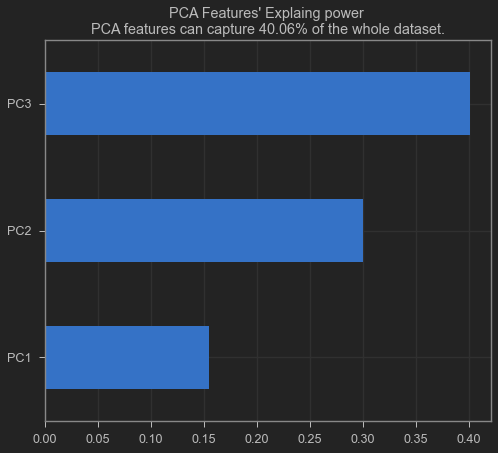

In [77]:
pca = PCA(n_components=3)
pc_feature_names = [f"PC{x}" for x in range(1, pca.n_components + 1)]
pca_data = pca.fit_transform(cluster_df)
pca_df = pd.DataFrame(pca_data, columns=pc_feature_names)
pd.Series(pca.explained_variance_ratio_.cumsum(), index=pc_feature_names).plot(
    kind='barh',
    title=
    f"""PCA Features' Explaing power \nPCA features can capture {((pca.explained_variance_ratio_.cumsum()[-1])*100).round(2)}% of the whole dataset."""
)
plt.grid()
plt.show()
pca_df['Clusters'] = clusters.astype('str')
fig = px.scatter_3d(pca_df,
                    x='PC1',
                    y='PC2',
                    z='PC3',
                    color='Clusters',
                    title='Cluster visualization with the help of PCA',
                    template='plotly_dark')
fig.update_traces(marker=dict(size=2))
fig.update_layout(width=700, height=500, bargap=0.05)
fig.show()

With only forty  percent explainability of the entire dataset by PCA, the clusters exhibit a clear separation between them in a three dimensional space. I am content with the selected K of 5. This will be further evaluated when performing inter cluster exploration in later part.

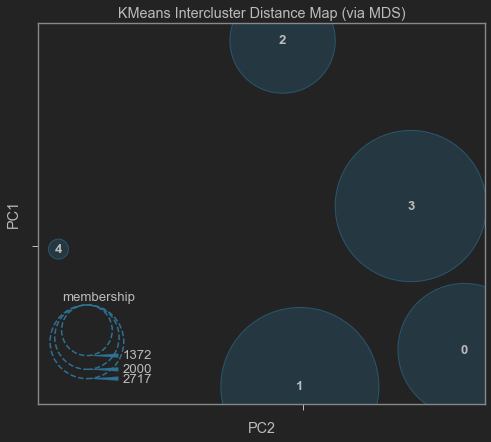

In [75]:
intercluster_distance(kmeans, X_segmentation, embedding='mds', random_state=33); # 'tsne'

### Feature importance

Newly created `cluster_df` is used to get the feature importance to get insights which features were often used for determining the segmentation. A Random Forest model is used to get feature importance alongside a permutation importance analysis to get the most important features.

In [40]:
X_feat_imp = cluster_df.drop(columns='Clusters').copy()
y_feat_imp = cluster_df.Clusters.copy()

In [41]:
X_feat_imp_train, X_feat_imp_test, y_feat_imp_train, y_feat_imp_test = train_test_split(
    X_feat_imp, y_feat_imp, train_size=.8)

******************************************************************************************
Train accuracy score: 0.9836
Test accuracy score: 0.9408
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

Test Report: 
************************************************************
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       184
           1       0.94      0.92      0.93       550
           2       0.95      0.94      0.95       621
           3       0.91      0.90      0.90       395
           4       0.96      0.99      0.98       276

    accuracy                           0.94      2026
   macro avg       0.94      0.95      0.95      2026
weighted avg       0.94      0.94      0.94      2026

************************************************************


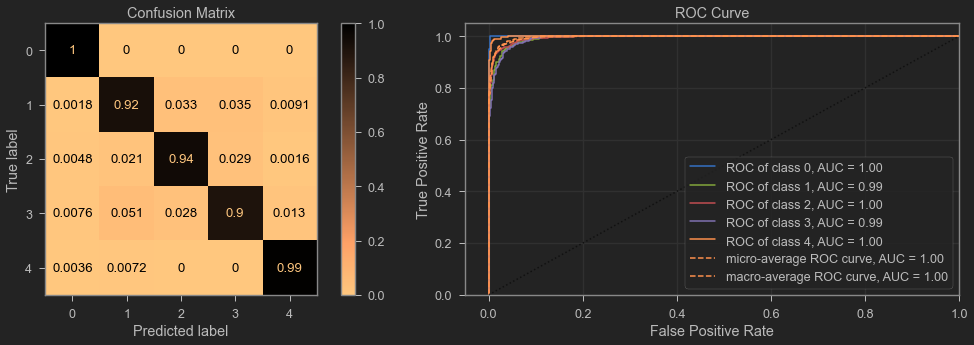

In [42]:
# Random Forest
clf_rf = RandomForestClassifier(
    n_jobs=-1,
    criterion='entropy',
    min_samples_leaf=5,
    min_samples_split=6,
    class_weight='balanced_subsample',
)
fn.model_report_multiclass(clf_rf,
                           X_feat_imp_train,
                           y_feat_imp_train,
                           X_feat_imp_test,
                           y_feat_imp_test,
                           show_train_report=False)

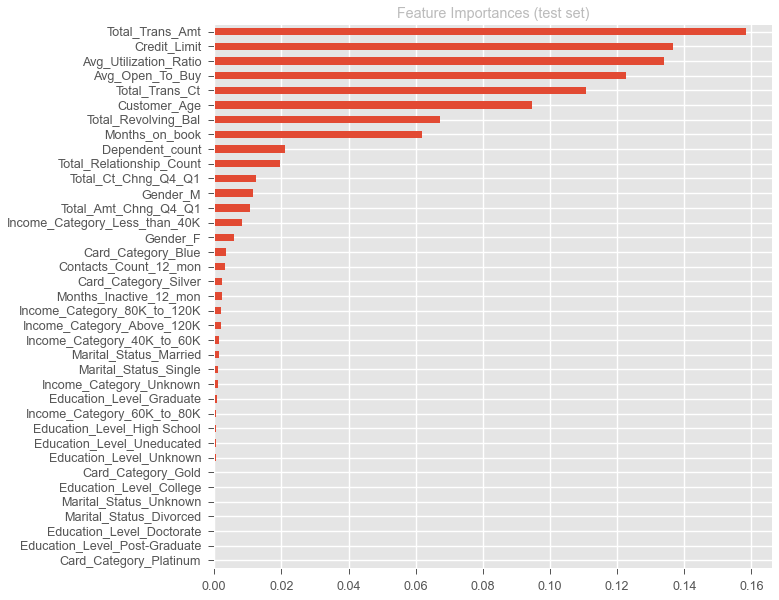

In [43]:
# Feature Importance
with plt.style.context('ggplot'):
    pd.Series(clf_rf.feature_importances_,
          index=X_feat_imp_test.columns).sort_values().plot(kind='barh',
                                                          figsize=(10, 10))
    plt.title('Feature Importances (test set)')

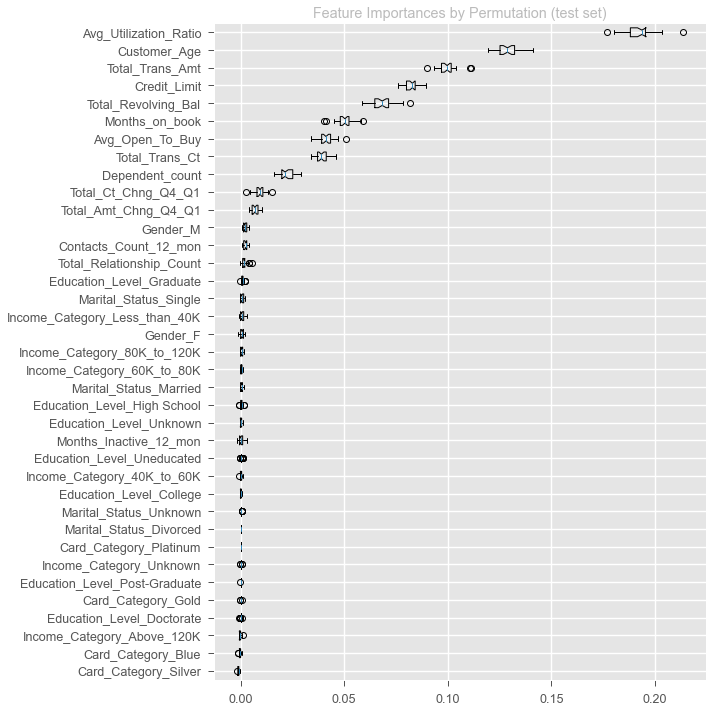

In [44]:
# Permutation Feature Importance
result = permutation_importance(clf_rf,
                                X_feat_imp_test,
                                y_feat_imp_test,
                                n_repeats=30,
                                random_state=42,
                                n_jobs=-1)
sorted_idx = result.importances_mean.argsort()
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.boxplot(result.importances[sorted_idx].T,
               notch=True,
               vert=False,
               labels=X_feat_imp_test.columns[sorted_idx])
    ax.set_title("Feature Importances by Permutation (test set)")
    fig.tight_layout()
    plt.show()

In [45]:
# fatures from the model
feature_importance = pd.Series(
    clf_rf.feature_importances_,
    index=X_feat_imp_test.columns).sort_values(ascending=False)

permutation_importance = pd.DataFrame(
    result.importances[sorted_idx].T,
    columns=X_feat_imp_test.columns[sorted_idx]).mean().sort_values(
        ascending=False)

important_features = pd.DataFrame([feature_importance,
                                   permutation_importance]).T
important_features.columns = ['feature_importance', 'permutation_importance']
important_features.plot(kind='barh',
                        figsize=(10, 15),
                        title="Most Important Features")
plt.show()

In [46]:
top_most_features = list(important_features[:10].index)
top_most_features

['Total_Trans_Amt',
 'Credit_Limit',
 'Avg_Utilization_Ratio',
 'Avg_Open_To_Buy',
 'Total_Trans_Ct',
 'Customer_Age',
 'Total_Revolving_Bal',
 'Months_on_book',
 'Dependent_count',
 'Total_Relationship_Count']

### Segmentation Characteristics

In [47]:
characteristics_df = X.copy()
characteristics_df['target'] = y.copy()
characteristics_df['Clusters'] = cluster_df.Clusters
characteristics_df

Customer_Age Gender  Dependent_count Education_Level Marital_Status  \
0                45      M                3     High School        Married   
1                49      F                5        Graduate         Single   
2                51      M                3        Graduate        Married   
3                40      F                4     High School        Unknown   
4                40      M                3      Uneducated        Married   
...             ...    ...              ...             ...            ...   
10122            50      M                2        Graduate         Single   
10123            41      M                2         Unknown       Divorced   
10124            44      F                1     High School        Married   
10125            30      M                2        Graduate        Unknown   
10126            43      F                2        Graduate        Married   

      Income_Category Card_Category  Months_on_book  Total_Relationship_Count  \
0          60K_to_80K          Blue              39                         5   
1       Less_than_40K          Blue              44                         6   
2         80K_to_120K          Blue              36                         4   
3       Less_than_40K          Blue              34                         3   
4          60K_to_80K          Blue              21                         5   
...               ...           ...             ...                       ...   
10122      40K_to_60K          Blue              40                         3   
10123      40K_to_60K          Blue              25                         4   
10124   Less_than_40K          Blue              36                         5   
10125      40K_to_60K          Blue              36                         4   
10126   Less_than_40K        Silver              25                         6   

       Months_Inactive_12_mon  ...  Credit_Limit  Total_Revolving_Bal  \
0                           1  ...       12691.0                  777   
1                           1  ...        8256.0                  864   
2                           1  ...        3418.0                    0   
3                           4  ...        3313.0                 2517   
4                           1  ...        4716.0                    0   
...                       ...  ...           ...                  ...   
10122                       2  ...        4003.0                 1851   
10123                       2  ...        4277.0                 2186   
10124                       3  ...        5409.0                    0   
10125                       3  ...        5281.0                    0   
10126                       2  ...       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  target  Clusters  
0                    1.625                  0.061       0         4  
1                    3.714                  0.105       0         2  
2                    2.333           

In [48]:
characteristics_df.dtypes

Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
target                        int64
Clusters                      int32
dtype: object

In [49]:
temp_char_dict = {}
for cluster in range(0, n_clusters):
    temp_df = characteristics_df.groupby(by='Clusters').get_group(cluster)
    temp_char_dict[cluster] = pd.Series(list(
        temp_df.value_counts().idxmax(axis=1)),
                                        index=list(temp_df.columns))
pd.DataFrame(temp_char_dict)

0           1           2  \
Customer_Age                         27          26          26   
Gender                                F           F           F   
Dependent_count                       0           0           0   
Education_Level                Graduate    Graduate     College   
Marital_Status                  Unknown      Single     Married   
Income_Category           Less_than_40K  40K_to_60K  40K_to_60K   
Card_Category                      Blue        Blue        Blue   
Months_on_book                       36          13          13   
Total_Relationship_Count              1           5           2   
Months_Inactive_12_mon                1           1           3   
Contacts_Count_12_mon                 2           2           3   
Credit_Limit                     4548.0      5655.0      2010.0   
Total_Revolving_Bal                1450           0        1070   
Avg_Open_To_Buy                  3098.0      5655.0       940.0   
Total_Amt_Chng_Q4_Q1              0.844       0.842       0.906   
Total_Trans_Amt                   14330        2312        3625   
Total_Trans_Ct                      131          61          85   
Total_Ct_Chng_Q4_Q1               0.638       0.649       0.635   
Avg_Utilization_Ratio             0.319         0.0       0.532   
target                                0           0           0   
Clusters                              0           1           2   

                                      3           4  
Customer_Age                         44          26  
Gender                                F           F  
Dependent_count                       0           0  
Education_Level                 College  Uneducated  
Marital_Status                  Married     Unknown  
Income_Category           Less_than_40K     Unknown  
Card_Category                      Blue      Silver  
Months_on_book                       40          13  
Total_Relationship_Count              5           1  
Months_Inactive_12_mon                4           2  
Contacts_Count_12_mon                 2           3  
Credit_Limit                     7499.0     34516.0  
Total_Revolving_Bal                1083        2403  
Avg_Open_To_Buy                  6416.0     32113.0  
Total_Amt_Chng_Q4_Q1              0.716       0.623  
Total_Trans_Amt                    2478        4174  
Total_Trans_Ct                       45          59  
Total_Ct_Chng_Q4_Q1               0.667       0.735  
Avg_Utilization_Ratio             0.144        0.07  
target                                1           0  
Clusters                              3           4

In [50]:
cluster_names = [f"Cluster_{x}" for x in range(0, n_clusters)]
for cluster in cluster_names:
    print(f'{cluster}: \n Most occuring values:')
    cluster = characteristics_df.groupby(by='Clusters').get_group(
        int(cluster.split("_")[1]))
    print(cluster.value_counts().idxmax())
    display(cluster)

Cluster_0: 
 Most occuring values:
(27, 'F', 0, 'Graduate', 'Unknown', 'Less_than_40K', 'Blue', 36, 1, 1, 2, 4548.0, 1450, 3098.0, 0.844, 14330, 131, 0.638, 0.319, 0, 0)


Customer_Age Gender  Dependent_count Education_Level Marital_Status  \
8271             40      M                2         College         Single   
8581             42      M                3     High School        Married   
8587             41      M                3        Graduate         Single   
8591             50      M                3     High School         Single   
8598             43      F                3         Unknown         Single   
...             ...    ...              ...             ...            ...   
10116            46      M                5         College         Single   
10117            57      M                2        Graduate        Married   
10120            54      M                1     High School         Single   
10121            56      F                1        Graduate         Single   
10122            50      M                2        Graduate         Single   

      Income_Category Card_Category  Months_on_book  Total_Relationship_Count  \
8271       60K_to_80K          Blue              28                         1   
8581      80K_to_120K          Blue              36                         2   
8587       40K_to_60K          Blue              37                         3   
8591      80K_to_120K          Blue              39                         3   
8598          Unknown          Blue              37                         2   
...               ...           ...             ...                       ...   
10116     80K_to_120K          Blue              36                         1   
10117     80K_to_120K          Blue              40                         6   
10120      60K_to_80K          Blue              34                         5   
10121   Less_than_40K          Blue              50                         4   
10122      40K_to_60K          Blue              40                         3   

       Months_Inactive_12_mon  ...  Credit_Limit  Total_Revolving_Bal  \
8271                        2  ...       10880.0                 2025   
8581                        3  ...       18177.0                  841   
8587                        3  ...        7839.0                 1544   
8591                        3  ...       21322.0                 2216   
8598                        3  ...       16583.0                 1797   
...                       ...  ...           ...                  ...   
10116                       2  ...       13187.0                 2241   
10117                       3  ...       17925.0                 1909   
10120                       2  ...       13940.0                 2109   
10121                       1  ...        3688.0                  606   
10122                       2  ...        4003.0                 1851   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
8271            8855.0                 0.753             4957              90   
8581           17336.0                 0.888             8512              94   
8587            6295.0                 0.715             7904              83   
8591           19106.0                 0.921             8693              91   
8598           14786.0                 0.889             7823              87   
...                ...                   ...              ...             ...   
10116          10946.0                 0.689            15354             112   
10117          16016.0                 0.712            17498             111   
10120          11831.0                 0.660            15577             114   
10121           3082.0                 0.570            14596             120   
10122           2152.0                 0.703            15476             117   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  target  Clusters  
8271                 0.765                  0.186       0         0  
8581                 0.679                  0.046       0         0  
8587                 0.804           

Cluster_1: 
 Most occuring values:
(26, 'F', 0, 'Graduate', 'Single', '40K_to_60K', 'Blue', 13, 5, 1, 2, 5655.0, 0, 5655.0, 0.842, 2312, 61, 0.649, 0.0, 0, 1)


Customer_Age Gender  Dependent_count Education_Level Marital_Status  \
19               45      F                2        Graduate        Married   
24               54      M                2         Unknown        Married   
28               44      F                3      Uneducated         Single   
37               42      F                4     High School        Married   
43               49      M                3     High School        Married   
...             ...    ...              ...             ...            ...   
10067            49      F                4      Uneducated        Married   
10089            52      F                5         Unknown        Married   
10118            50      M                1         Unknown        Unknown   
10124            44      F                1     High School        Married   
10125            30      M                2        Graduate        Unknown   

      Income_Category Card_Category  Months_on_book  Total_Relationship_Count  \
19            Unknown          Blue              37                         6   
24        80K_to_120K          Blue              42                         4   
28            Unknown          Blue              34                         5   
37      Less_than_40K          Gold              36                         2   
43         60K_to_80K          Blue              37                         5   
...               ...           ...             ...                       ...   
10067      40K_to_60K          Blue              36                         5   
10089   Less_than_40K          Blue              36                         4   
10118     80K_to_120K          Blue              36                         6   
10124   Less_than_40K          Blue              36                         5   
10125      40K_to_60K          Blue              36                         4   

       Months_Inactive_12_mon  ...  Credit_Limit  Total_Revolving_Bal  \
19                          1  ...       14470.0                 1157   
24                          2  ...       12217.0                    0   
28                          2  ...       10100.0                    0   
37                          3  ...       15433.0                    0   
43                          2  ...        3906.0                    0   
...                       ...  ...           ...                  ...   
10067                       2  ...        4167.0                    0   
10089                       3  ...        9611.0                    0   
10118                       3  ...        9959.0                  952   
10124                       3  ...        5409.0                    0   
10125                       3  ...        5281.0                    0   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
19             13313.0                 0.966             1207              21   
24             12217.0                 1.075             1110              21   
28             10100.0                 0.525             1052              18   
37             15433.0                 0.865              966              22   
43              3906.0                 1.214             1756              32   
...                ...                   ...              ...             ...   
10067           4167.0                 0.581             7590              87   
10089           9611.0                 0.840             7636              64   
10118           9007.0                 0.825            10310              63   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  target  Clusters  
19                   0.909                  0.080       0         1  
24                   0.750                  0.000       0         1  
28                   1.571           

Cluster_2: 
 Most occuring values:
(26, 'F', 0, 'College', 'Married', '40K_to_60K', 'Blue', 13, 2, 3, 3, 2010.0, 1070, 940.0, 0.906, 3625, 85, 0.635, 0.532, 0, 2)


Customer_Age Gender  Dependent_count Education_Level Marital_Status  \
1                49      F                5        Graduate         Single   
2                51      M                3        Graduate        Married   
3                40      F                4     High School        Unknown   
4                40      M                3      Uneducated        Married   
5                44      M                2        Graduate        Married   
...             ...    ...              ...             ...            ...   
10054            33      F                1       Doctorate         Single   
10071            37      M                3         Unknown         Single   
10092            40      F                3        Graduate        Married   
10123            41      M                2         Unknown       Divorced   
10126            43      F                2        Graduate        Married   

      Income_Category Card_Category  Months_on_book  Total_Relationship_Count  \
1       Less_than_40K          Blue              44                         6   
2         80K_to_120K          Blue              36                         4   
3       Less_than_40K          Blue              34                         3   
4          60K_to_80K          Blue              21                         5   
5          40K_to_60K          Blue              36                         3   
...               ...           ...             ...                       ...   
10054   Less_than_40K          Blue              15                         1   
10071      40K_to_60K          Blue              29                         6   
10092         Unknown          Blue              25                         1   
10123      40K_to_60K          Blue              25                         4   
10126   Less_than_40K        Silver              25                         6   

       Months_Inactive_12_mon  ...  Credit_Limit  Total_Revolving_Bal  \
1                           1  ...        8256.0                  864   
2                           1  ...        3418.0                    0   
3                           4  ...        3313.0                 2517   
4                           1  ...        4716.0                    0   
5                           1  ...        4010.0                 1247   
...                       ...  ...           ...                  ...   
10054                       1  ...        3709.0                 1180   
10071                       2  ...       13589.0                 2517   
10092                       2  ...        6888.0                 1878   
10123                       2  ...        4277.0                 2186   
10126                       2  ...       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
5               2763.0                 1.376             1088              24   
...                ...                   ...              ...             ...   
10054           2529.0                 0.645             8130              74   
10071          11072.0                 0.941             9456              79   
10092           5010.0                 1.059             9038              64   
10123           2091.0                 0.804             8764              69   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  target  Clusters  
1                    3.714                  0.105       0         2  
2                    2.333                  0.000       0         2  
3                    2.333           

Cluster_3: 
 Most occuring values:
(44, 'F', 0, 'College', 'Married', 'Less_than_40K', 'Blue', 40, 5, 4, 2, 7499.0, 1083, 6416.0, 0.716, 2478, 45, 0.667, 0.144, 1, 3)


Customer_Age Gender  Dependent_count Education_Level Marital_Status  \
9                48      M                2        Graduate         Single   
11               65      M                1         Unknown        Married   
12               56      M                1         College         Single   
14               57      F                2        Graduate        Married   
18               61      M                1     High School        Married   
...             ...    ...              ...             ...            ...   
10013            52      F                0       Doctorate        Married   
10023            49      F                0         Unknown        Married   
10105            59      F                1     High School        Married   
10107            61      M                0        Graduate         Single   
10119            55      F                3      Uneducated         Single   

      Income_Category Card_Category  Months_on_book  Total_Relationship_Count  \
9         80K_to_120K          Blue              36                         6   
11         40K_to_60K          Blue              54                         6   
12        80K_to_120K          Blue              36                         3   
14      Less_than_40K          Blue              48                         5   
18         40K_to_60K          Blue              56                         2   
...               ...           ...             ...                       ...   
10013   Less_than_40K          Blue              36                         4   
10023   Less_than_40K          Blue              39                         1   
10105   Less_than_40K          Blue              50                         1   
10107      60K_to_80K          Blue              54                         2   
10119         Unknown          Blue              47                         4   

       Months_Inactive_12_mon  ...  Credit_Limit  Total_Revolving_Bal  \
9                           3  ...       11656.0                 1677   
11                          2  ...        9095.0                 1587   
12                          6  ...       11751.0                    0   
14                          2  ...        2436.0                  680   
18                          2  ...        3193.0                 2517   
...                       ...  ...           ...                  ...   
10013                       3  ...        4353.0                 1489   
10023                       3  ...        4982.0                 2517   
10105                       4  ...        5043.0                  743   
10107                       1  ...       11859.0                 1644   
10119                       3  ...       14657.0                 2517   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
9               9979.0                 1.524             1441              32   
11              7508.0                 1.433             1314              26   
12             11751.0                 3.397             1539              17   
14              1756.0                 1.190             1570              29   
18               676.0                 1.831             1336              30   
...                ...                   ...              ...             ...   
10013           2864.0                 0.945             9226              85   
10023           2465.0                 0.903             9274              65   
10105           4300.0                 0.805            10170              66   
10107          10215.0                 0.866             8930              79   
10119          12140.0                 0.166             6009              53   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  target  Clusters  
9                    0.882                  0.144       0         3  
11                   1.364                  0.174       0         3  
12                   3.250           

Cluster_4: 
 Most occuring values:
(26, 'F', 0, 'Uneducated', 'Unknown', 'Unknown', 'Silver', 13, 1, 2, 3, 34516.0, 2403, 32113.0, 0.623, 4174, 59, 0.735, 0.07, 0, 4)


Customer_Age Gender  Dependent_count Education_Level Marital_Status  \
0                45      M                3     High School        Married   
6                51      M                4         Unknown        Married   
7                32      M                0     High School        Unknown   
8                37      M                3      Uneducated         Single   
16               48      M                4   Post-Graduate         Single   
...             ...    ...              ...             ...            ...   
10065            38      M                2     High School       Divorced   
10098            55      M                3        Graduate         Single   
10103            51      M                1     High School        Married   
10108            47      M                4        Graduate       Divorced   
10112            33      M                2         College        Married   

      Income_Category Card_Category  Months_on_book  Total_Relationship_Count  \
0          60K_to_80K          Blue              39                         5   
6          Above_120K          Gold              46                         6   
7          60K_to_80K        Silver              27                         2   
8          60K_to_80K          Blue              36                         5   
16        80K_to_120K          Blue              36                         6   
...               ...           ...             ...                       ...   
10065      60K_to_80K        Silver              25                         1   
10098      Above_120K        Silver              36                         4   
10103     80K_to_120K          Blue              36                         4   
10108     80K_to_120K          Blue              39                         4   
10112      Above_120K          Gold              20                         2   

       Months_Inactive_12_mon  ...  Credit_Limit  Total_Revolving_Bal  \
0                           1  ...       12691.0                  777   
6                           1  ...       34516.0                 2264   
7                           2  ...       29081.0                 1396   
8                           2  ...       22352.0                 2517   
16                          2  ...       30367.0                 2362   
...                       ...  ...           ...                  ...   
10065                       2  ...       26794.0                  821   
10098                       3  ...       34516.0                    0   
10103                       3  ...       22754.0                    0   
10108                       3  ...       17504.0                  476   
10112                       1  ...       34516.0                    0   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
6              32252.0                 1.975             1330              31   
7              27685.0                 2.204             1538              36   
8              19835.0                 3.355             1350              24   
16             28005.0                 1.708             1671              27   
...                ...                   ...              ...             ...   
10065          25973.0                 0.848             8788              58   
10098          34516.0                 1.007             9931              70   
10103          22754.0                 0.799             8531              77   
10108          17028.0                 0.892            10468              66   
10112          34516.0                 1.004             9338              73   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  target  Clusters  
0                    1.625                  0.061       0         4  
6                    0.722                  0.066       0         4  
7                    0.714           

In [51]:
cluster_dict = dict(tuple(characteristics_df.groupby('Clusters')))
for i in range(n_clusters):
    print("Cluster " + str(i)+' description:')
    display(eval("cluster_dict[" + str(i)+"]").describe(include='all').T)

Cluster 0 description:


count unique            top freq          mean  \
Customer_Age              977.0    NaN            NaN  NaN     45.341863   
Gender                      977      2              M  588           NaN   
Dependent_count           977.0    NaN            NaN  NaN      2.338792   
Education_Level             977      7       Graduate  312           NaN   
Marital_Status              977      4        Married  439           NaN   
Income_Category             977      6  Less_than_40K  272           NaN   
Card_Category               977      4           Blue  778           NaN   
Months_on_book            977.0    NaN            NaN  NaN     35.211873   
Total_Relationship_Count  977.0    NaN            NaN  NaN      2.183214   
Months_Inactive_12_mon    977.0    NaN            NaN  NaN      2.224156   
Contacts_Count_12_mon     977.0    NaN            NaN  NaN      2.175026   
Credit_Limit              977.0    NaN            NaN  NaN  13507.578301   
Total_Revolving_Bal       977.0    NaN            NaN  NaN   1402.448311   
Avg_Open_To_Buy           977.0    NaN            NaN  NaN   12105.12999   
Total_Amt_Chng_Q4_Q1      977.0    NaN            NaN  NaN      0.775094   
Total_Trans_Amt           977.0    NaN            NaN  NaN  13144.038895   
Total_Trans_Ct            977.0    NaN            NaN  NaN    106.001024   
Total_Ct_Chng_Q4_Q1       977.0    NaN            NaN  NaN      0.729927   
Avg_Utilization_Ratio     977.0    NaN            NaN  NaN      0.178038   
target                    977.0    NaN            NaN  NaN      0.016377   
Clusters                  977.0    NaN            NaN  NaN           0.0   

                                  std     min      25%      50%      75%  \
Customer_Age                 7.637256    27.0     41.0     46.0     51.0   
Gender                            NaN     NaN      NaN      NaN      NaN   
Dependent_count              1.291864     0.0      1.0      2.0      3.0   
Education_Level                   NaN     NaN      NaN      NaN      NaN   
Marital_Status                    NaN     NaN      NaN      NaN      NaN   
Income_Category                   NaN     NaN      NaN      NaN      NaN   
Card_Category                     NaN     NaN      NaN      NaN      NaN   
Months_on_book               7.655435    13.0     31.0     36.0     40.0   
Total_Relationship_Count      1.18659     1.0      1.0      2.0      3.0   
Months_Inactive_12_mon       0.984464     1.0      1.0      2.0      3.0   
Contacts_Count_12_mon        0.953354     0.0      1.0      2.0      3.0   
Credit_Limit              9921.814347  2019.0   5282.0  10353.0  18341.0   
Total_Revolving_Bal        708.529891     0.0   1060.0   1481.0   1907.0   
Avg_Open_To_Buy           9935.945586   553.0   3936.0   9027.0  17328.0   
Total_Amt_Chng_Q4_Q1          0.11037   0.507    0.699    0.759    0.845   
Total_Trans_Amt           2954.380645  4957.0  12575.0  14242.0  15124.0   
Total_Trans_Ct              13.032628    63.0     97.0    106.0    116.0   
Total_Ct_Chng_Q4_Q1          0.103683   0.412    0.662    0.731    0.797   
Avg_Utilization_Ratio        0.169453     0.0    0.057    0.127    0.248   
target                       0.126984     0.0      0.0      0.0      0.0   
Clusters                          0.0     0.0      0.0      0.0      0.0   

                              max  
Customer_Age                 63.0  
Gender                        NaN  
Dependent_count               5.0  
Education_Level               NaN  
Marital_Status                NaN  
Income_Category               NaN  
Card_Category                 NaN  
Months_on_book               56.0  
Total_Relationship_Count      6.0  
Months_Inactive_12_mon        6.0  
Contacts_Count_12_mon         6.0  
Credit_Limit              34516.0  
Total_Revolving_Bal        2517.0  
Avg_Open_To_Buy           34516.0  
Total_Amt_Chng_Q4_Q1        1.232  
Total_Trans_Amt           18484.0  
Total_Trans_Ct              139.0  
Total_Ct_Chng_Q4_Q1         1.14

Cluster 1 description:


count unique            top  freq         mean  \
Customer_Age              2717.0    NaN            NaN   NaN    44.327199   
Gender                      2717      2              F  1583          NaN   
Dependent_count           2717.0    NaN            NaN   NaN      2.58042   
Education_Level             2717      7       Graduate   840          NaN   
Marital_Status              2717      4        Married  1207          NaN   
Income_Category             2717      6  Less_than_40K  1012          NaN   
Card_Category               2717      4           Blue  2646          NaN   
Months_on_book            2717.0    NaN            NaN   NaN    34.231137   
Total_Relationship_Count  2717.0    NaN            NaN   NaN     3.861612   
Months_Inactive_12_mon    2717.0    NaN            NaN   NaN     2.419212   
Contacts_Count_12_mon     2717.0    NaN            NaN   NaN     2.619801   
Credit_Limit              2717.0    NaN            NaN   NaN  5804.867685   
Total_Revolving_Bal       2717.0    NaN            NaN   NaN   310.391608   
Avg_Open_To_Buy           2717.0    NaN            NaN   NaN  5494.476077   
Total_Amt_Chng_Q4_Q1      2717.0    NaN            NaN   NaN     0.712263   
Total_Trans_Amt           2717.0    NaN            NaN   NaN  3391.271991   
Total_Trans_Ct            2717.0    NaN            NaN   NaN    59.179978   
Total_Ct_Chng_Q4_Q1       2717.0    NaN            NaN   NaN     0.650925   
Avg_Utilization_Ratio     2717.0    NaN            NaN   NaN     0.050664   
target                    2717.0    NaN            NaN   NaN     0.326831   
Clusters                  2717.0    NaN            NaN   NaN          1.0   

                                  std     min     25%     50%     75%      max  
Customer_Age                 6.612517    26.0    40.0    45.0    49.0     63.0  
Gender                            NaN     NaN     NaN     NaN     NaN      NaN  
Dependent_count              1.216552     0.0     2.0     3.0     3.0      5.0  
Education_Level                   NaN     NaN     NaN     NaN     NaN      NaN  
Marital_Status                    NaN     NaN     NaN     NaN     NaN      NaN  
Income_Category                   NaN     NaN     NaN     NaN     NaN      NaN  
Card_Category                     NaN     NaN     NaN     NaN     NaN      NaN  
Months_on_book               6.574285    13.0    31.0    36.0    38.0     51.0  
Total_Relationship_Count     1.490763     1.0     3.0     4.0     5.0      6.0  
Months_Inactive_12_mon       0.979825     0.0     2.0     2.0     3.0      6.0  
Contacts_Count_12_mon        1.121857     0.0     2.0     3.0     3.0      6.0  
Credit_Limit              4223.771992  1438.3  2054.0  4532.0  8621.0  18432.0  
Total_Revolving_Bal         496.68118     0.0     0.0     0.0   672.0   2174.0  
Avg_Open_To_Buy           4069.772269   552.3  1950.0  4263.0  8017.0  18386.0  
Total_Amt_Chng_Q4_Q1         0.190366     0.0    0.59   0.706   0.825    1.893  
Total_Trans_Amt           1616.655592   510.0  2131.0  3350.0  4447.0  10583.0  
Total_Trans_Ct              19.362663    10.0    42.0    62.0    75.0    103.0  
Total_Ct_Chng_Q4_Q1          0.212597     0.0   0.511    0.65    0.78    2.222  
Avg_Utilization_Ratio        0.087924     0.0     0.0     0.0   0.091    0.616  
target                       0.469141     0.0     0.0     0.0     1.0      1.0  
Clusters                          0.0     1.0     1.0     1.0     1.0      1.0

Cluster 2 description:


count unique            top  freq         mean  \
Customer_Age              3061.0    NaN            NaN   NaN    42.119569   
Gender                      3061      2              F  2090          NaN   
Dependent_count           3061.0    NaN            NaN   NaN     2.649788   
Education_Level             3061      7       Graduate   961          NaN   
Marital_Status              3061      4        Married  1412          NaN   
Income_Category             3061      6  Less_than_40K  1495          NaN   
Card_Category               3061      3           Blue  3039          NaN   
Months_on_book            3061.0    NaN            NaN   NaN    31.989546   
Total_Relationship_Count  3061.0    NaN            NaN   NaN       4.0049   
Months_Inactive_12_mon    3061.0    NaN            NaN   NaN     2.281281   
Contacts_Count_12_mon     3061.0    NaN            NaN   NaN     2.342372   
Credit_Limit              3061.0    NaN            NaN   NaN  3860.525417   
Total_Revolving_Bal       3061.0    NaN            NaN   NaN  1680.508004   
Avg_Open_To_Buy           3061.0    NaN            NaN   NaN  2180.017413   
Total_Amt_Chng_Q4_Q1      3061.0    NaN            NaN   NaN     0.797153   
Total_Trans_Amt           3061.0    NaN            NaN   NaN  3709.213002   
Total_Trans_Ct            3061.0    NaN            NaN   NaN     64.94773   
Total_Ct_Chng_Q4_Q1       3061.0    NaN            NaN   NaN      0.76253   
Avg_Utilization_Ratio     3061.0    NaN            NaN   NaN      0.53748   
target                    3061.0    NaN            NaN   NaN     0.080366   
Clusters                  3061.0    NaN            NaN   NaN          2.0   

                                  std     min     25%     50%     75%      max  
Customer_Age                 6.260736    26.0    38.0    43.0    47.0     58.0  
Gender                            NaN     NaN     NaN     NaN     NaN      NaN  
Dependent_count              1.250434     0.0     2.0     3.0     4.0      5.0  
Education_Level                   NaN     NaN     NaN     NaN     NaN      NaN  
Marital_Status                    NaN     NaN     NaN     NaN     NaN      NaN  
Income_Category                   NaN     NaN     NaN     NaN     NaN      NaN  
Card_Category                     NaN     NaN     NaN     NaN     NaN      NaN  
Months_on_book               6.509462    13.0    28.0    34.0    36.0     49.0  
Total_Relationship_Count     1.491252     1.0     3.0     4.0     5.0      6.0  
Months_Inactive_12_mon       1.007296     0.0     2.0     2.0     3.0      6.0  
Contacts_Count_12_mon        1.084832     0.0     2.0     2.0     3.0      6.0  
Credit_Limit              2568.206148  1438.3  2289.0  2900.0  4502.0  16612.0  
Total_Revolving_Bal        503.868448     0.0  1305.0  1662.0  2053.0   2517.0  
Avg_Open_To_Buy           2447.879754     3.0   694.0  1102.0  2736.0  14424.0  
Total_Amt_Chng_Q4_Q1         0.232706     0.0   0.657    0.76   0.886    2.594  
Total_Trans_Amt           1479.436364   643.0  2441.0  4074.0  4625.0  14257.0  
Total_Trans_Ct              18.424033    12.0    51.0    69.0    79.0    109.0  
Total_Ct_Chng_Q4_Q1          0.252604     0.0   0.628   0.738    0.86    3.714  
Avg_Utilization_Ratio        0.212671     0.0   0.364   0.558   0.705    0.999  
target                       0.271903     0.0     0.0     0.0     0.0      1.0  
Clusters                          0.0     2.0     2.0     2.0     2.0      2.0

Cluster 3 description:


count unique            top  freq        mean  \
Customer_Age              2000.0    NaN            NaN   NaN      55.952   
Gender                      2000      2              F  1155         NaN   
Dependent_count           2000.0    NaN            NaN   NaN       1.405   
Education_Level             2000      7       Graduate   616         NaN   
Marital_Status              2000      4        Married  1072         NaN   
Income_Category             2000      6  Less_than_40K   781         NaN   
Card_Category               2000      3           Blue  1969         NaN   
Months_on_book            2000.0    NaN            NaN   NaN      44.593   
Total_Relationship_Count  2000.0    NaN            NaN   NaN       4.169   
Months_Inactive_12_mon    2000.0    NaN            NaN   NaN      2.4075   
Contacts_Count_12_mon     2000.0    NaN            NaN   NaN       2.485   
Credit_Limit              2000.0    NaN            NaN   NaN  5120.81665   
Total_Revolving_Bal       2000.0    NaN            NaN   NaN    1391.411   
Avg_Open_To_Buy           2000.0    NaN            NaN   NaN  3729.40565   
Total_Amt_Chng_Q4_Q1      2000.0    NaN            NaN   NaN    0.757195   
Total_Trans_Amt           2000.0    NaN            NaN   NaN   3108.5555   
Total_Trans_Ct            2000.0    NaN            NaN   NaN     55.9635   
Total_Ct_Chng_Q4_Q1       2000.0    NaN            NaN   NaN    0.711277   
Avg_Utilization_Ratio     2000.0    NaN            NaN   NaN    0.379869   
target                    2000.0    NaN            NaN   NaN       0.133   
Clusters                  2000.0    NaN            NaN   NaN         3.0   

                                  std     min      25%     50%      75%  \
Customer_Age                 4.702845    44.0     53.0    56.0     59.0   
Gender                            NaN     NaN      NaN     NaN      NaN   
Dependent_count              1.080536     0.0      1.0     1.0      2.0   
Education_Level                   NaN     NaN      NaN     NaN      NaN   
Marital_Status                    NaN     NaN      NaN     NaN      NaN   
Income_Category                   NaN     NaN      NaN     NaN      NaN   
Card_Category                     NaN     NaN      NaN     NaN      NaN   
Months_on_book               6.076908    30.0     40.0    45.0     49.0   
Total_Relationship_Count     1.430896     1.0      3.0     4.0      5.0   
Months_Inactive_12_mon       1.083527     0.0      2.0     2.0      3.0   
Contacts_Count_12_mon        1.112382     0.0      2.0     3.0      3.0   
Credit_Limit              3763.117208  1438.3   2422.5  3517.5  6909.25   
Total_Revolving_Bal        697.379879     0.0    975.0  1456.5   1892.0   
Avg_Open_To_Buy           3725.139024    10.0    962.0  2160.0  5471.25   
Total_Amt_Chng_Q4_Q1         0.247699     0.0    0.609   0.726   0.8625   
Total_Trans_Amt           1588.814085   530.0  1618.75  3075.0  4363.75   
Total_Trans_Ct              20.742041    10.0     37.0    58.0     74.0   
Total_Ct_Chng_Q4_Q1          0.263373     0.0    0.561   0.688    0.826   
Avg_Utilization_Ratio        0.256527     0.0    0.167   0.352  0.59025   
target                        0.33966     0.0      0.0     0.0      0.0   
Clusters                          0.0     3.0      3.0     3.0      3.0   

                              max  
Customer_Age                 73.0  
Gender                        NaN  
Dependent_count               5.0  
Education_Level               NaN  
Marital_Status                NaN  
Income_Category               NaN  
Card_Category                 NaN  
Months_on_book               56.0  
Total_Relationship_Count      6.0  
Months_Inactive_12_mon        6.0  
Contacts_Count_12_mon         6.0  
Credit_Limit              23566.0  
Total_Revolving_Bal        2517.0  
Avg_Open_To_Buy           21896.0  
Total_Amt_Chng_Q4_Q1        3.397  
Total_Trans_Amt           10170.0  
Total_Trans_Ct              104.0  
Total_Ct_Chng_Q4_Q1         3.571  
Avg_Utilization_Rat

Cluster 4 description:


count unique          top  freq          mean  \
Customer_Age              1372.0    NaN          NaN   NaN     46.337464   
Gender                      1372      2            M  1231           NaN   
Dependent_count           1372.0    NaN          NaN   NaN      2.582362   
Education_Level             1372      7     Graduate   399           NaN   
Marital_Status              1372      4       Single   565           NaN   
Income_Category             1372      6  80K_to_120K   569           NaN   
Card_Category               1372      4         Blue  1004           NaN   
Months_on_book            1372.0    NaN          NaN   NaN     35.956997   
Total_Relationship_Count  1372.0    NaN          NaN   NaN      3.927114   
Months_Inactive_12_mon    1372.0    NaN          NaN   NaN      2.306851   
Contacts_Count_12_mon     1372.0    NaN          NaN   NaN      2.537901   
Credit_Limit              1372.0    NaN          NaN   NaN  26522.131195   
Total_Revolving_Bal       1372.0    NaN          NaN   NaN   1192.008017   
Avg_Open_To_Buy           1372.0    NaN          NaN   NaN  25330.123178   
Total_Amt_Chng_Q4_Q1      1372.0    NaN          NaN   NaN      0.764548   
Total_Trans_Amt           1372.0    NaN          NaN   NaN   3624.896501   
Total_Trans_Ct            1372.0    NaN          NaN   NaN     59.575073   
Total_Ct_Chng_Q4_Q1       1372.0    NaN          NaN   NaN      0.710143   
Avg_Utilization_Ratio     1372.0    NaN          NaN   NaN      0.049041   
target                    1372.0    NaN          NaN   NaN       0.15379   
Clusters                  1372.0    NaN          NaN   NaN           4.0   

                                  std      min       25%      50%      75%  \
Customer_Age                 6.597126     26.0      42.0     46.0     51.0   
Gender                            NaN      NaN       NaN      NaN      NaN   
Dependent_count              1.219132      0.0       2.0      3.0      3.0   
Education_Level                   NaN      NaN       NaN      NaN      NaN   
Marital_Status                    NaN      NaN       NaN      NaN      NaN   
Income_Category                   NaN      NaN       NaN      NaN      NaN   
Card_Category                     NaN      NaN       NaN      NaN      NaN   
Months_on_book               6.715239     13.0      32.0     36.0     39.0   
Total_Relationship_Count     1.521236      1.0       3.0      4.0      5.0   
Months_Inactive_12_mon       0.968435      0.0       2.0      2.0      3.0   
Contacts_Count_12_mon        1.149328      0.0       2.0      3.0      3.0   
Credit_Limit               6887.51212  12691.0  20229.75  26158.0  34516.0   
Total_Revolving_Bal        792.140229      0.0     653.5   1291.0   1752.5   
Avg_Open_To_Buy           6965.649001  10848.0   19084.0  25086.0  32606.0   
Total_Amt_Chng_Q4_Q1         0.237326      0.0   0.62075    0.738  0.88125   
Total_Trans_Amt           2162.814088    597.0    1809.0   3420.0  4367.25   
Total_Trans_Ct              20.179957     10.0      43.0     62.0     75.0   
Total_Ct_Chng_Q4_Q1          0.254154      0.0     0.564    0.684    0.806   
Avg_Utilization_Ratio          0.0363      0.0     0.022    0.049  0.07225   
target                       0.360879      0.0       0.0      0.0      0.0   
Clusters                          0.0      4.0       4.0      4.0      4.0   

                              max  
Customer_Age                 65.0  
Gender                        NaN  
Dependent_count               5.0  
Education_Level               NaN  
Marital_Status                NaN  
Income_Category               NaN  
Card_Category                 NaN  
Months_on_book               56.0  
Total_Relationship_Count      6.0  
Months_Inactive_12_mon        6.0  
Contacts_Count_12_mon         6.0  
Credit_Limit              34516.0  
Total_Revolving_Bal        2517.0  
Avg_Open_To_Buy           34516.0  
Total_Amt_Chng_Q4_Q1        3.355  
Total_Trans_Amt           14954.0  
Total_Trans_Ct           

#### intra cluster EDA

In [52]:
@interact(Cluster=cluster_dict.keys())
def show_clusters(Cluster):
    fn.cluster_insights(cluster_dict[Cluster])

interactive(children=(Dropdown(description='Cluster', options=(0, 1, 2, 3, 4), value=0), Output()), _dom_class…

comment

#### inter cluster EDA

In [53]:
@interact(Cluster=fixed(characteristics_df), feature=characteristics_df.columns)
def show_clusters(Cluster, feature='Customer_Age'):
    fig = px.histogram(Cluster,
                   x=feature,
                   marginal="box",
                   template='presentation',
                   color='Clusters',
                   barmode='group',
                   title=f'"{feature}" seperated by Clusters',
                   hover_data=Cluster)
#     fig.update_traces(opacity=0.8)
    fig.show()
    pass

interactive(children=(Dropdown(description='feature', options=('Customer_Age', 'Gender', 'Dependent_count', 'E…

comment

name clusters

## Prediction

In [54]:
cluster_df['target'] = df.Attrition_Flag.map(churn_map).copy()
cluster_df

Customer_Age  Dependent_count  Months_on_book  \
0         -0.165406         0.503368        0.384621   
1          0.333570         2.043199        1.010715   
2          0.583058         0.503368        0.008965   
3         -0.789126         1.273283       -0.241473   
4         -0.789126         0.503368       -1.869317   
...             ...              ...             ...   
10122      0.458314        -0.266547        0.509840   
10123     -0.664382        -0.266547       -1.368442   
10124     -0.290150        -1.036462        0.008965   
10125     -2.036565        -0.266547        0.008965   
10126     -0.414894        -0.266547       -1.368442   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                      0.763943               -1.327136   
1                      1.407306               -1.327136   
2                      0.120579               -1.327136   
3                     -0.522785                1.641478   
4                      0.763943               -1.327136   
...                         ...                     ...   
10122                 -0.522785               -0.337598   
10123                  0.120579               -0.337598   
10124                  0.763943                0.651940   
10125                  0.120579                0.651940   
10126                  1.407306               -0.337598   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                   0.492404      0.446622            -0.473422   
1                  -0.411616     -0.041367            -0.366667   
2                  -2.219655     -0.573698            -1.426858   
3                  -1.315636     -0.585251             1.661686   
4                  -2.219655     -0.430877            -1.426858   
...                      ...           ...                  ...   
10122               0.492404     -0.509330             0.844455   
10123               0.492404     -0.479181             1.255524   
10124               1.396424     -0.354626            -1.426858   
10125               0.492404     -0.368710            -1.426858   
10126               1.396424      0.193220             0.979433   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  ...  \
0             0.488971              2.623494  ...   
1            -0.008486              3.563293  ...   
2            -0.445658              8.367214  ...   
3            -0.734100              2.942843  ...   
4            -0.302868              6.455682  ...   
...                ...                   ...  ...   
10122        -0.584929             -0.259771  ...   
10123        -0.591639              0.201004  ...   
10124        -0.226632              0.269436  ...   
10125        -0.240713             -1.026208  ...   
10126         0.105372             -0.259771  ...   

       Income_Category_80K_to_120K  Income_Category_Above_120K  \
0                              0.0                         0.0   
1                              0.0                         0.0   
2                              1.0                         0.0   
3                              0.0                         0.0   
4                              0.0                         0.0   
...                            ...                         ...   
10122                          0.0                         0.0   
10123                          0.0                         0.0   
10124                          0.0                         0.0   
10125                          0.0                         0.0   
10126                          0.0                         0.0   

       Income_Category_Less_than_40K  Income_Category_Unknown  \
0                                0.0                      0.0   
1                                1.0                      0.0   
2                                0.0                      0.0   
3                                1.0                      0.0   
4                                0.0                      0.0   


In [55]:
X_additional_col = cluster_df.drop(columns='target').copy()
y_additional_col = cluster_df.target.copy()

In [56]:
X_train_pr, X_test_pr, y_train, y_test = train_test_split(X_additional_col, y_additional_col, train_size=.8)

In [57]:
oversampling1 = SMOTENC(categorical_features=smotenc_features, n_jobs=-1)

In [58]:
X_train_pr_os, y_train_encoded_os = oversampling1.fit_sample(X_train_pr, y_train)

### Baseline model

In [59]:
base_model = DummyClassifier(strategy='stratified')

******************************************************************************************
Train accuracy score: 0.5109
Test accuracy score: 0.4985
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

Train Report: 
************************************************************
              precision    recall  f1-score   support

           0       0.50      0.51      0.51      6814
           1       0.50      0.50      0.50      6814

    accuracy                           0.50     13628
   macro avg       0.50      0.50      0.50     13628
weighted avg       0.50      0.50      0.50     13628

************************************************************


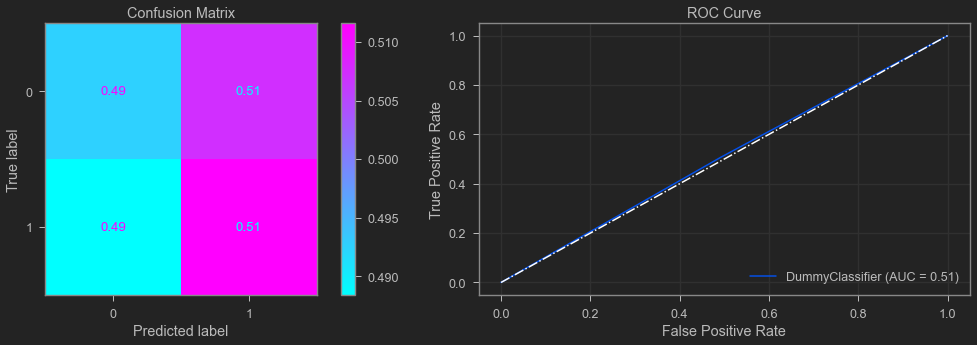

Test Report: 
************************************************************
              precision    recall  f1-score   support

           0       0.85      0.52      0.65      1686
           1       0.18      0.53      0.27       340

    accuracy                           0.52      2026
   macro avg       0.51      0.53      0.46      2026
weighted avg       0.74      0.52      0.58      2026

************************************************************


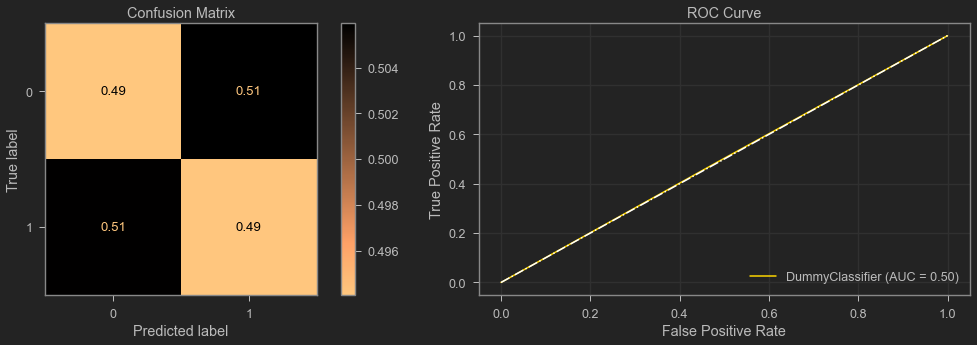

In [60]:
fn.model_report(base_model, X_train_pr_os, y_train_encoded_os, X_test_pr,
                y_test)

### Logistic Regression

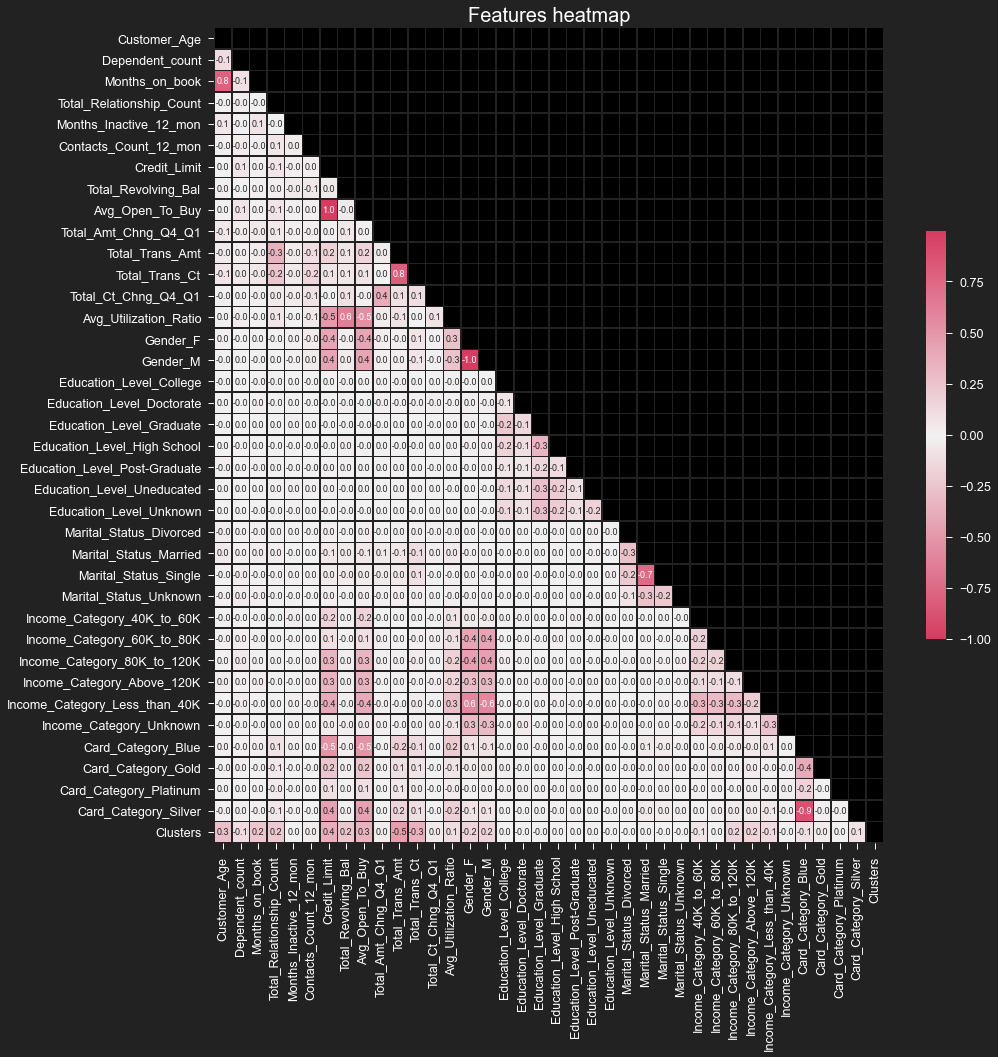

In [61]:
fn.heatmap_of_features(X_additional_col);

In [62]:
fn.drop_features_based_on_correlation(X_additional_col)

{'Avg_Open_To_Buy',
 'Card_Category_Silver',
 'Gender_M',
 'Months_on_book',
 'Total_Trans_Ct'}

Multicollinearity undermines the statistical significance of an independent variable. Here it is important to point out that multicollinearity does not affect the model's predictive accuracy. Choosing not to deal with this issue right now. 

Outlier removal should also be performed on the dataset 

******************************************************************************************
Train accuracy score: 0.9232
Test accuracy score: 0.8909
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

Test Report: 
************************************************************
              precision    recall  f1-score   support

           0       0.94      0.93      0.93      1686
           1       0.67      0.68      0.68       340

    accuracy                           0.89      2026
   macro avg       0.80      0.81      0.81      2026
weighted avg       0.89      0.89      0.89      2026

************************************************************


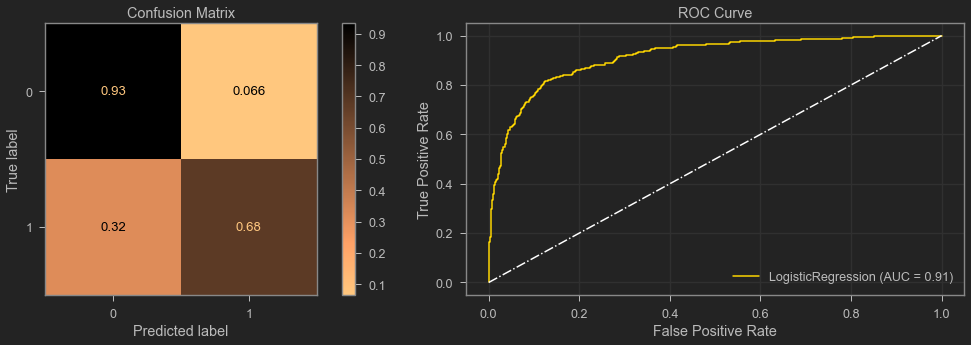

In [63]:
logreg = LogisticRegression( max_iter=1000, class_weight='balanced')
# score of logistic regression classifier
fn.model_report(logreg,
             X_train_pr_os,
             y_train_encoded_os,
             X_test_pr,
             y_test,
             show_train_report=False)

Odds ratios are used to measure the relative odds of the occurrence of the outcome, given a factor of interest [[Bland JM, Altman DG.(2000), The odds ratio]](https://www.bmj.com/content/bmj/320/7247/1468.1.full.pdf). The odds ratio is used to determine whether a particular attribute is a risk factor or protective factor for a particular class and the magnitude of percentage effect is used to compare the various risk factors for that class. The positive percentage effect means that the factor is positively correlated with churn and vice versa. 

The odds ratio and percentage effect of each feature are estimated as $\mathbf{OddsRatio} = e^{\Theta }$ and $\mathbf{Effect (\%)} = 100 * (OddsRatio - 1)$, where $\Theta$ is the value of weight of each feature in Logistic Regression model. If the effect is positive, the greater the factor, the likely that the client will churn, those factors are considered as risk factors. While if the effect is negative, the greater the factor, the greater the possibility that the customer will not churn, and can be considered as protective factors. This is a Bayesian approach for identifying feature importance. 

In [64]:
churn_feature = pd.DataFrame(logreg.coef_, columns=X_train_pr.columns).T
churn_feature.columns = ['weights']
churn_feature['odds_ratio'] = np.exp(churn_feature['weights'])
churn_feature['effect'] = 100*(churn_feature['odds_ratio'] - 1)
churn_feature

weights  odds_ratio      effect
Customer_Age                  -0.118897    0.887899  -11.210072
Dependent_count                0.225821    1.253351   25.335098
Months_on_book                -0.029669    0.970767   -2.923272
Total_Relationship_Count      -0.655718    0.519069  -48.093060
Months_Inactive_12_mon         0.541528    1.718630   71.863033
Contacts_Count_12_mon          0.631493    1.880416   88.041551
Credit_Limit                  -0.090429    0.913539   -8.646113
Total_Revolving_Bal           -0.749102    0.472791  -52.720924
Avg_Open_To_Buy               -0.023253    0.977016   -2.298447
Total_Amt_Chng_Q4_Q1          -0.122621    0.884599  -11.540142
Total_Trans_Amt                1.888070    6.606608  560.660764
Total_Trans_Ct                -2.997083    0.049933  -95.006750
Total_Ct_Chng_Q4_Q1           -0.636646    0.529064  -47.093593
Avg_Utilization_Ratio         -0.119637    0.887242  -11.275762
Gender_F                       0.536995    1.710859   71.085858
Gender_M                      -0.530294    0.588432  -41.156778
Education_Level_College       -4.553715    0.010528  -98.947198
Education_Level_Doctorate     -4.167209    0.015495  -98.450456
Education_Level_Graduate      -3.915073    0.019939  -98.006091
Education_Level_High School   -4.294100    0.013649  -98.635115
Education_Level_Post-Graduate -4.458404    0.011581  -98.841916
Education_Level_Uneducated    -4.484969    0.011277  -98.872276
Education_Level_Unknown       -4.346925    0.012947  -98.705344
Marital_Status_Divorced       -3.437490    0.032145  -96.785474
Marital_Status_Married        -3.231508    0.039498  -96.050210
Marital_Status_Single         -2.931238    0.053331  -94.666901
Marital_Status_Unknown        -3.416623    0.032823  -96.717690
Income_Category_40K_to_60K    -4.003103    0.018259  -98.174111
Income_Category_60K_to_80K    -3.881333    0.020623  -97.937669
Income_Category_80K_to_120K   -3.617558    0.026848  -97.315183
Income_Category_Above_120K    -3.380425    0.034033  -96.596702
Income_Category_Less_than_40K -3.517307    0.029679  -97.032076
Income_Category_Unknown       -4.243733    0.014354  -98.564610
Card_Category_Blue            -0.735855    0.479096  -52.090449
Card_Category_Gold            -0.605939    0.545562  -45.443821
Card_Category_Platinum        -0.183884    0.832032  -16.796754
Card_Category_Silver          -0.829068    0.436456  -56.354402
Clusters                       0.145981    1.157174   15.717389

In [75]:
logreg_1 = LogisticRegression(max_iter=1000, class_weight='balanced')
# score of logistic regression classifier
fn.model_report(logreg_1,
                X_train_pr_os.drop(columns=[
                    'Avg_Open_To_Buy', 'Card_Category_Silver', 'Gender_M',
                    'Months_on_book', 'Total_Trans_Ct'
                ]),
                y_train_encoded_os,
                X_test_pr.drop(columns=[
                    'Avg_Open_To_Buy', 'Card_Category_Silver', 'Gender_M',
                    'Months_on_book', 'Total_Trans_Ct'
                ]),
                y_test,
                show_train_report=False)

******************************************************************************************
Train accuracy score: 0.8966
Test accuracy score: 0.8677
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

Test Report: 
************************************************************
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      1686
           1       0.62      0.53      0.57       340

    accuracy                           0.87      2026
   macro avg       0.77      0.73      0.75      2026
weighted avg       0.86      0.87      0.86      2026

************************************************************


The accuracy is good enough. But the the residual must be crazy as indicated by the f-1 and precision values.
Supports my previous point about model performance. Outlier removal is next. Not pursuing that because data loss will be very high as there are lots of recurring values for the numeric values (lots of zeros) for both IQR and Z-score based approach.

### Random Forest

#### OG data

******************************************************************************************
Train accuracy score: 1.0
Test accuracy score: 0.9635
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

Test Report: 
************************************************************
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1702
           1       0.93      0.84      0.88       324

    accuracy                           0.96      2026
   macro avg       0.95      0.91      0.93      2026
weighted avg       0.96      0.96      0.96      2026

************************************************************


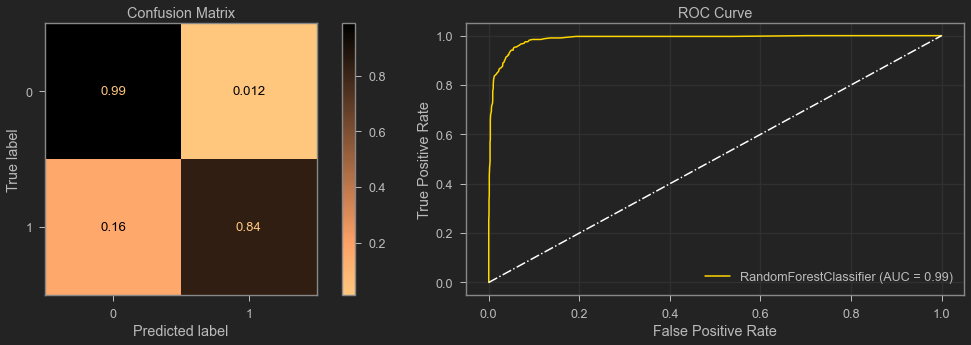

In [65]:
clf_rf = RandomForestClassifier(n_jobs=-1)
fn.model_report(clf_rf,
             X_train_pr,
             y_train,
             X_test_pr,
             y_test,
             show_train_report=False)

#### OS data

In [66]:
clf_rf = RandomForestClassifier(n_jobs=-1)
fn.model_report(clf_rf,
             X_train_pr_os,
             y_train_encoded_os,
             X_test_pr,
             y_test,
             show_train_report=False)

******************************************************************************************
Train accuracy score: 1.0
Test accuracy score: 0.959
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

Test Report: 
************************************************************
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1702
           1       0.86      0.89      0.87       324

    accuracy                           0.96      2026
   macro avg       0.92      0.93      0.92      2026
weighted avg       0.96      0.96      0.96      2026

************************************************************


#### Grid Search

In [67]:
rf_clf_gs = RandomForestClassifier(n_jobs=-1, verbose=0)
params = {
    'criterion': ["gini", "entropy"],
    'max_depth': [5, 6, 7, 8, 9, 10],
    'min_samples_leaf': [2, 3, 4],
    #     'class_weight': ["balanced", "balanced_subsample"]
}
gridsearch_rf_clf = GridSearchCV(estimator=rf_clf_gs,
                                 param_grid=params,
                                 n_jobs=-1,
                                 scoring='f1_macro')
gridsearch_rf_clf

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [2, 3, 4]},
             scoring='f1_macro')

In [68]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    gridsearch_rf_clf.fit(X_train_pr_os, y_train_encoded_os)
print(f"Best Parameters by gridsearch:\t{gridsearch_rf_clf.best_params_}")
print(f"Best Estimator by gridsearch:\t{gridsearch_rf_clf.best_estimator_}")

rf_clf_gs_best = gridsearch_rf_clf.best_estimator_

Best Parameters by gridsearch:	{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2}
Best Estimator by gridsearch:	RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_jobs=-1)


In [69]:
# import sklearn
# sorted(sklearn.metrics.SCORERS.keys())

******************************************************************************************
Train accuracy score: 0.9848
Test accuracy score: 0.9511
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

Test Report: 
************************************************************
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      1702
           1       0.81      0.90      0.86       324

    accuracy                           0.95      2026
   macro avg       0.90      0.93      0.91      2026
weighted avg       0.95      0.95      0.95      2026

************************************************************


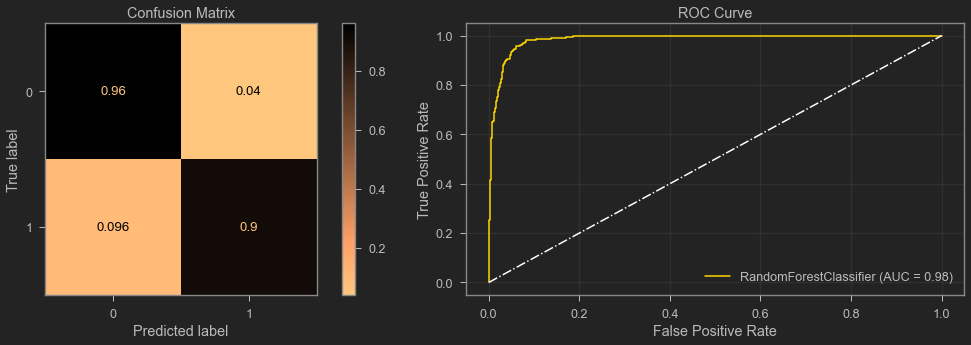

In [70]:
fn.model_report(rf_clf_gs_best, X_train_pr_os, y_train_encoded_os, X_test_pr,
             y_test,
             show_train_report=False)

### XGBoost

#### XGBClassifier

******************************************************************************************
Train accuracy score: 1.0
Test accuracy score: 0.9714
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

Test Report: 
************************************************************
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1686
           1       0.91      0.91      0.91       340

    accuracy                           0.97      2026
   macro avg       0.95      0.95      0.95      2026
weighted avg       0.97      0.97      0.97      2026

************************************************************


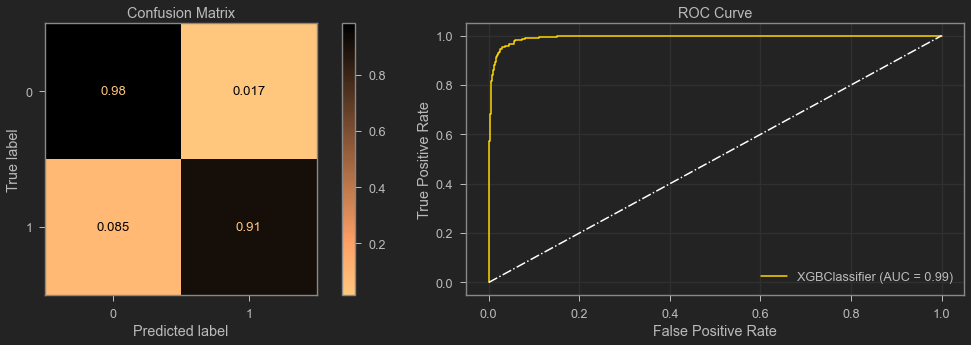

In [80]:
clf_xg = XGBClassifier(n_jobs=-1)
fn.model_report(clf_xg, X_train_pr_os, y_train_encoded_os, X_test_pr, y_test,
             show_train_report=False)

In [72]:
## Grid search

In [73]:
xgg_clf_gs = XGBClassifier(
    n_jobs=-1, verbosity=0, objective='binary:logistic',
    eval_metric='error')  #“rank:pairwise”,“count:poisson” #'logloss','auc'
params = {
    'criterion': ["gini", "entropy"],
    'max_depth': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3, 4],
    'class_weight': ["balanced", "balanced_subsample"],
    'ccp_alpha': [0.0, 0.05, 0.1, 0.2, 0.3],
    'importance_type':
    ["gain", "weight", "cover", "total_gain", "total_cover"],
}
gridsearch_xgg_clf_gs = GridSearchCV(
    estimator=xgg_clf_gs, param_grid=params, n_jobs=-1,
    scoring='precision')  #'roc_auc_ovr_weighted'
gridsearch_xgg_clf_gs

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, eval_metric='error',
                                     gamma=None, gpu_id=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estima...
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
                                     verbosity=0),
             n_jobs=-1,
             param_grid={'cc

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    gridsearch_xgg_clf_gs.fit(X_train_pr_os, y_train_encoded_os)
    
xgg_clf_gs_best = gridsearch_xgg_clf_gs.best_estimator_

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

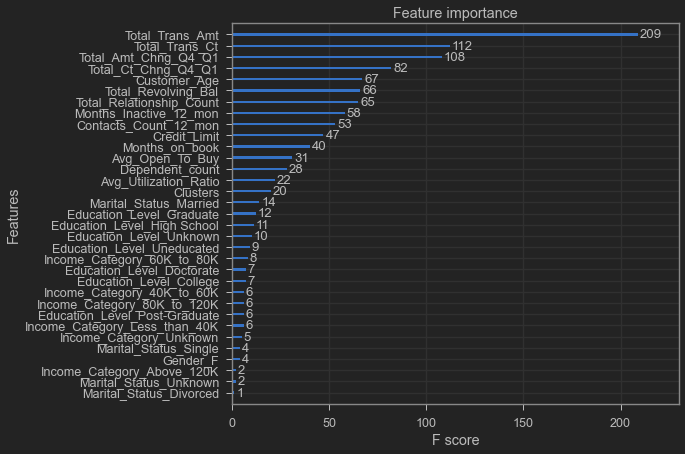

In [76]:
xgb.plot_importance(xgg_clf_gs_best);

In [75]:
fn.model_report(xgg_clf_gs_best, X_train_pr_os, y_train_encoded_os, X_test_pr, y_test,
             show_train_report=False)

******************************************************************************************
Train accuracy score: 0.9971
Test accuracy score: 0.9659
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

Test Report: 
************************************************************
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      1702
           1       0.87      0.92      0.90       324

    accuracy                           0.97      2026
   macro avg       0.93      0.95      0.94      2026
weighted avg       0.97      0.97      0.97      2026

************************************************************


#### XGBRFClassifier

In [77]:
clf_xg_rf = XGBRFClassifier(n_jobs=-1)
fn.model_report(clf_xg_rf, X_train_pr_os, y_train_encoded_os, X_test_pr, y_test,
             show_train_report=False)

******************************************************************************************
Train accuracy score: 0.9518
Test accuracy score: 0.9255
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

Test Report: 
************************************************************
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      1702
           1       0.71      0.90      0.79       324

    accuracy                           0.93      2026
   macro avg       0.85      0.91      0.87      2026
weighted avg       0.94      0.93      0.93      2026

************************************************************


### Best model

******************************************************************************************
Train accuracy score: 1.0
Test accuracy score: 0.9704
    No over or underfitting detected, diffrence of scores did not cross 5% thresh hold.
******************************************************************************************

Test Report: 
************************************************************
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1702
           1       0.90      0.92      0.91       324

    accuracy                           0.97      2026
   macro avg       0.94      0.95      0.95      2026
weighted avg       0.97      0.97      0.97      2026

************************************************************


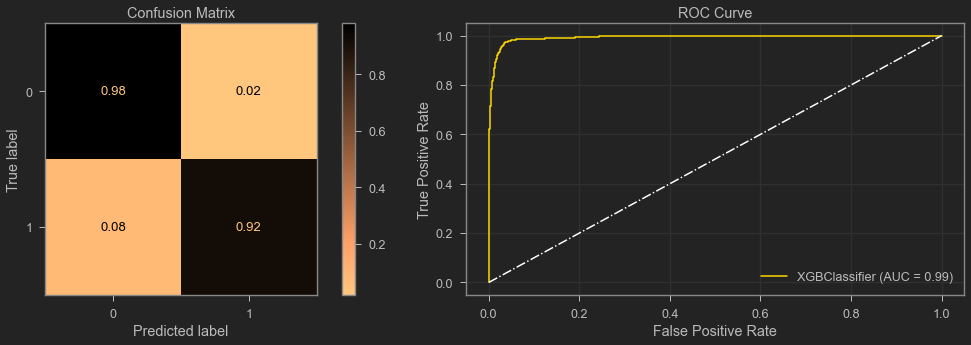

In [78]:
fn.model_report(clf_xg,
                X_train_pr_os,
                y_train_encoded_os,
                X_test_pr,
                y_test,
                show_train_report=False,
                fitted_model=True)

In [78]:
# init shap
shap.initjs()

In [81]:
explainer = shap.TreeExplainer(clf_xg)
shap_values = explainer.shap_values(X_test_pr)

In [83]:
with plt.style.context('seaborn-white'):
    shap.summary_plot(shap_values, X_test_pr)

In [85]:
eli5.format_as_dataframe(eli5.explain_weights(
    clf_xg, feature_names=list(X_test_pr.columns)))

feature    weight
0                Total_Trans_Ct  0.261081
1           Total_Revolving_Bal  0.079481
2      Total_Relationship_Count  0.072611
3               Total_Trans_Amt  0.054719
4                      Gender_F  0.046512
5        Months_Inactive_12_mon  0.039577
6       Education_Level_College  0.038613
7         Contacts_Count_12_mon  0.032720
8           Total_Ct_Chng_Q4_Q1  0.030708
9    Income_Category_60K_to_80K  0.030558
10      Education_Level_Unknown  0.030028
11   Education_Level_Uneducated  0.027573
12         Total_Amt_Chng_Q4_Q1  0.021398
13                 Customer_Age  0.019571
14    Education_Level_Doctorate  0.018397
15              Avg_Open_To_Buy  0.017202
16  Education_Level_High School  0.016947
17   Income_Category_40K_to_60K  0.015005
18       Marital_Status_Unknown  0.014051
19      Income_Category_Unknown  0.013676

In [ ]:
# Save segmentation model
# get params of best model
# save model after fitting on entire dataset

# INTERPRET 

## Customer Segmentation model

In [ ]:
# with churn

## Churn Prediction model

# RECOMMENDATION

In [ ]:
# Reflection on interpretion

# CONCLUSION

In [ ]:
# caviats

# NEXT STEPS

Gaussian Mixture Models

A part of the business challenge is determining how soon you want the model to forecast. A prediction that is made too long in advance may be less accurate. A narrow prediction horizon, on the other hand, may perform better in terms of accuracy, but it may be too late to act after the consumer has made her decision.

Finally, it is critical to establish whether churn should be characterized at the product level (customers who are likely to discontinue using a certain product, such as a credit card) or at the relationship level (client likely to extricate from the bank itself). When data is evaluated at the relationship level, you gain a wider insight of the customer's perspective. Excessive withdrawals from a savings account, for example, may be used to pay for a deposit on a house or education costs. Such insights into client life events are extremely effective not just for preventing churn, but also for cross-selling complementary items that may enhance the engagement even further.

# APPENDIX

## all functions and imports from the `functions.py` and `packages.py`

In [ ]:
fn.show_py_file_content(file='./imports_and_functions/functions.py')

In [ ]:
fn.show_py_file_content(file='./imports_and_functions/packages.py')

## Dashboard

### SVC

In [ ]:
# clf_svc = SVC(kernel='linear', C=100, class_weight='balanced')
# clf_svc = SVC(kernel='rbf', C=1, gamma='auto', class_weight='balanced', tol=.8)
clf_svc = SVC(kernel='poly', degree=4, C=1, gamma='scale', class_weight='balanced')
# clf_svc = SVC(kernel='sigmoid', C=2, class_weight='balanced')

In [ ]:
fn.model_report(clf_svc, X_train_pr_os, y_train_encoded_os, X_test_pr, y_test,
             show_train_report=False)

# TODO

- Text
    - all
- Code
    - EDA segmentation
- Readme
    - all
- PPT
    - all
- Dash
    - all

```python
['yellowbrick',
'eli5',
'shap',
'imblearn',
'seaborn',
'numpy',
'pandas',
'xgboost',
'matplotlib',
'sklearn',
'plotly',
'IPython',
'ipywidgets',
'warnings',
'scipy']
 ```